# Лабораторная работа №3 «Цифровой спектральный анализ детерминированных сигналов»



In [1]:
import numpy as np # импорт бибилиотеки numpy
import matplotlib.pyplot as plt # импорт модуля matplotlib.pyplot
from scipy import signal
import scipy.io.wavfile
from IPython.display import Audio
def DTFT(x, M=None):
    """
    Функция вычисляет значения ДВПФ в M точках на отрезке 
    по оси нормированных частот [-0.5; 0.5]

    Parameters
    ----------
    x : complex
        входная последовательность отсчетов, первый отсчет при k=0
    M : int
        количество точек на отрезке [-0.5; 0.5]

    Returns
    -------
    float
        значения оси нормированных частот, 
        соответствующих вычисленным значениям
        спектральной функции  
    complex
        значения спектральной функции      
    """
    if M is None:
        M=16*x.size
    return (-0.5+(np.arange(M)/M), np.fft.fftshift(np.fft.fft(x, M)))


In [2]:
# Если используете Jupyter, то можно поменять backend
%matplotlib notebook


In [3]:
%matplotlib inline

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Занятие 1. ДПФ и спектральный анализ.

## Задача 1.1.  Частотная ось ДПФ.

| Варианты: |       1      |     2     |         3        |      4     |        5        |        6       |
|:---------:|:------------:|:---------:|:----------------:|:----------:|:---------------:|:--------------:|
| **Имя файла** | 'cello1.wav' | 'cello2.wav' | 'glockenspiel.wav' | 'vibraphone1.wav' | 'clarinet.wav' | 'guitar.wav' |

| Варианты: |       7      |     8     |         9        |      10     |        11        |        12       |
|:---------:|:------------:|:---------:|:----------------:|:----------:|:---------------:|:--------------:|
| **Имя файла** | 'cello3.wav' | 'cello4.wav' | 'tuning-fork.wav' | 'vibraphone2.wav' | 'flute.wav' | 'wine-glass.wav' |




Считайте отсчеты дискретного сигнала $x[k]$, содержащегося в аудиофайле Вашего варианта. 

1) Выберите $y[k]$ — часть информативной области сигнала $x[k]$ длиной $2^{14}$ отсчетов. Если в файле меньше $2^{14}$ отсчетов, дополните ее нулями до этого числа отчетов справа.  

2) Постройте с помощью алгоритма БПФ один период ДВПФ сигнала $y[k]$. Укажите расстояние между точками по оси частот. Ось частот приведите в Гц. Определите по графику частоты основных гармонических компонент. 

3) выведите график сигнала $y[k]$ в области, где наблюдается колебание. По графику оцените период этого колебания $T_0$. Сравните частоту $f_0=1/ T_0$ с частотами основных гармоник из п.2.



In [5]:
fs, x = scipy.io.wavfile.read('/content/drive/MyDrive/Classroom/Лаборатория ИКТ (Б01-908, Б01-909)/dataset/vibraphone1.wav')

In [6]:
Audio('/content/drive/MyDrive/Classroom/Лаборатория ИКТ (Б01-908, Б01-909)/dataset/vibraphone1.wav')

In [7]:
print("Частота дискретизации:", fs)
print("отсчеты сигнала:")
x

Частота дискретизации: 44100
отсчеты сигнала:


array([-29, -46, -46, ...,   1,   1,  -3], dtype=int16)

In [8]:
if len(x.shape)==2:
        x=x[:, 0]

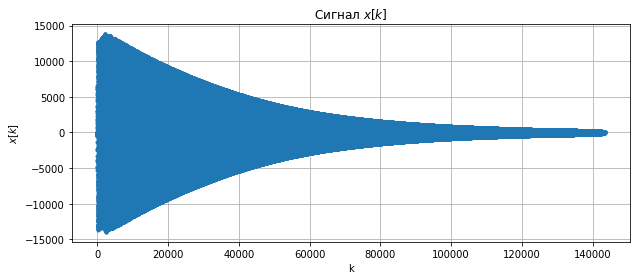

In [9]:
plt.figure(figsize=[10, 4])
plt.plot(np.arange(x.size), x, '.')
plt.grid()
plt.title("Cигнал $x[k]$")
plt.xlabel("k")
plt.ylabel("$x[k]$")
plt.show()

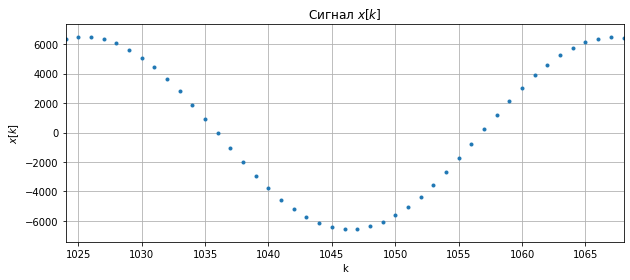

In [10]:
#Выведем увеличенный график 'y' и посчитаем период несущей сигнала
y=x[32000:32000+2**14]
plt.figure(figsize=[10, 4])
plt.plot(np.arange(y.size), y, '.')
plt.xlim([1024, 1068])
plt.grid()
plt.title("Cигнал $x[k]$")
plt.xlabel("k")
plt.ylabel("$x[k]$")
plt.show()

In [11]:
print("теоретически одна из компонент спектра (частота):", 1/((1067-1025)/fs))

теоретически одна из компонент спектра (частота): 1050.0


143336 16384


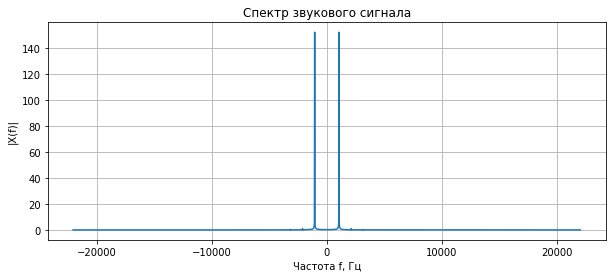

In [12]:
plt.figure(figsize=[10, 4])
plt.title("Спектр звукового сигнала")
print(len(x), 2**14)
y=x[32000:32000+2**14]

# y=y*signal.windows.blackman(y.size, sym=False)

nu, Xf = DTFT(y, M=2048)
plt.plot(nu*fs, abs(Xf)/fs, '-')
plt.grid()
plt.xlabel("Частота f, Гц")
plt.ylabel("|X(f)|");

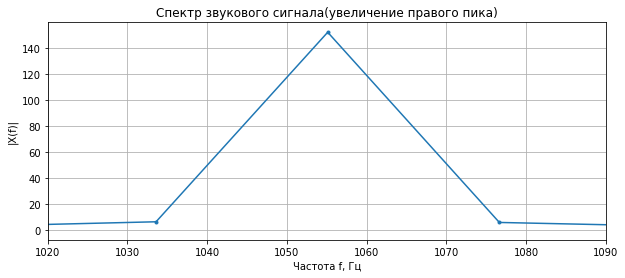

In [13]:
plt.figure(figsize=[10, 4])
plt.title("Спектр звукового сигнала(увеличение правого пика)")
y=x[32000:32000+2**14]

# позволяет поглотить боковые липестки
# минусы: максимумы начинают расширяться и в какой то момент сливаться
# y=y*signal.windows.blackman(y.size, sym=False)

nu, Xf = DTFT(y, M=2048)
plt.plot(nu*fs, abs(Xf)/fs, '.-')
plt.xlim([1020, 1090])
plt.grid()
plt.xlabel("Частота f, Гц")
plt.ylabel("|X(f)|");

In [14]:
print("расстояние между точками:", fs / 2048)
# пик сходится с теоретической частотой

расстояние между точками: 21.533203125


## Задача 1.2. Задача распознавания спектральных компонент. 

Считайте последовательность $x[k]$ из файла Вашего варианта (`variant_Nv_ex_1_2.npy`, где `Nv` — номер варианта). Известно, что ее аналитическая запись  имеет вид 

$$x[k]=\sum\limits_{m=1}^{M}{{{A}_{m}}}\sin (2\pi \frac{m}{N}k+{{\varphi }_{m}}),\quad k=0,\ 1,\ 2,\ \ldots ,\ N-1,$$


где $N$ — длина последовательности, $M<N$ — число гармонических компонент c ненулевой амплитудой, относительные частоты которых совпадают с бинами ДПФ. Определите число компонент $M$,  их амплитуды ${{A}_{m}}$ и фазы ${{\varphi }_{m}}$, $m=1,\dots, M$.


In [15]:
Nv=4 #вариант
x = np.load('/content/drive/MyDrive/Classroom/Лаборатория ИКТ (Б01-908, Б01-909)/dataset/variant_%i_ex_1_2.npy' %Nv )

In [16]:
N = len(x)
Xn = np.fft.fft(x)
Xn

array([-1.34114941e-13+0.00000000e+00j, -8.88178420e-15-7.81597009e-14j,
        1.26121336e-13+9.68114477e-14j, -2.80664381e-13+1.01252340e-13j,
       -1.15403938e-13-1.21050829e-13j,  1.13686838e-13-1.27897692e-13j,
       -1.76892924e-13-1.60357853e-13j,  1.24344979e-14-2.27373675e-13j,
        3.20069126e-14-1.91840195e-13j,  6.73239242e-13+4.48000000e+02j,
       -2.10447853e-13+1.39628889e-13j,  1.91846539e-13-3.19744231e-14j,
        2.33704234e-14+6.69125494e-13j, -1.01476647e-13-8.13089973e-14j,
       -2.27373675e-13+1.44773082e-13j, -3.73998721e-13-3.51936469e-14j,
       -7.54951657e-14+1.08357767e-13j, -5.63105118e-13-1.63424829e-13j,
        2.24000000e+02-1.09512399e-12j,  3.81916720e-13-2.41584530e-13j,
        3.87590244e-13-1.48572315e-13j,  4.08562073e-13+2.80664381e-13j,
        2.69748619e-13+6.82875441e-14j,  1.97175609e-13+2.27373675e-13j,
       -1.86549958e-13+4.40542840e-13j,  4.08562073e-14-7.10542736e-15j,
       -1.92062047e-13+6.51872527e-13j,  8.00000000

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  


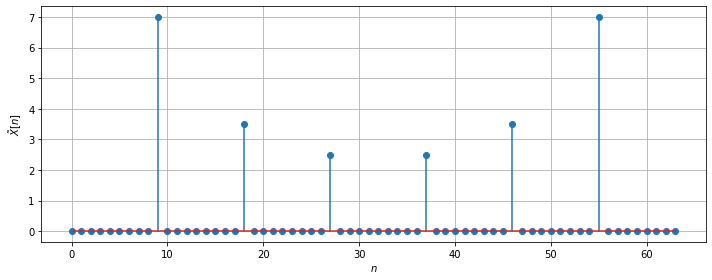

In [17]:
plt.figure(figsize=[10, 4])
plt.stem(np.arange(Xn.size), abs(Xn)/N)
plt.ylabel("$\\tilde{X}[n]$")
plt.xlabel("$n$")
plt.tight_layout()
plt.grid()
plt.show()

In [18]:
9 / 64

0.140625

In [19]:
18 / 64

0.28125

In [20]:
27 / 64

0.421875

In [21]:
# пики наблюдаются на отсчетах 9, 18 и 27
# определение амплитуды
print("А[9]", 2 * abs(Xn[9] / N))
print("А[18]", 2 * abs(Xn[18] / N))
print("А[27]", 2 * abs(Xn[27] / N))

А[9] 14.000000000000004
А[18] 6.999999999999998
А[27] 4.999999999999991


In [22]:
# определение фазы
print("фаза для отсчета 9 :", np.angle(Xn[9]) + (np.pi / 2))
print("фаза для отсчета 18:", np.angle(Xn[18]) + (np.pi / 2))
print("фаза для отсчета 27:", np.angle(Xn[27]) + (np.pi / 2))

фаза для отсчета 9 : 3.141592653589792
фаза для отсчета 18: 1.5707963267948917
фаза для отсчета 27: 0.5235987755982903


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  This is separate from the ipykernel package so we can avoid doing imports until


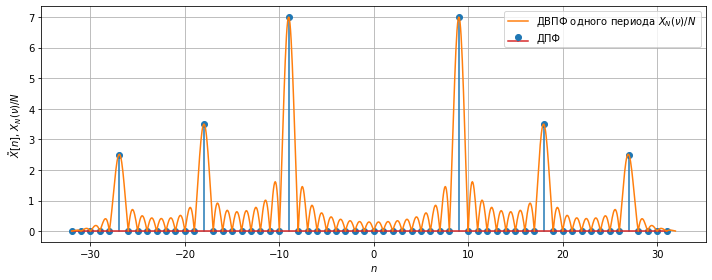

In [23]:
Yn=np.fft.fftshift(Xn)
plt.figure(figsize=[10, 4])
plt.stem(np.arange(Yn.size)-Yn.size//2, abs(Yn)/N, label="ДПФ")
plt.ylabel("$\\tilde{X}[n]$, $X_N(\\nu)/N$")
plt.xlabel("$n$")
nu, Xf = DTFT(x)
plt.plot(nu*N, abs(Xf)/N, 'C1', label="ДВПФ одного периода $X_N(\\nu)/N$")
plt.tight_layout()
plt.grid()
plt.legend()
plt.show()

# Занятие 2. Окна в спектральном анализе.

In [24]:
def get_main_width(db):
  middle = len(db) / 2 + 1
  for i in range(int(middle), len(db)):
      if (db[i] > db[i - 1] and db[i] < -0.1):
          return i

def get_list_db_levl(db, N=1, eps=0):
  middle = len(db) / 2 + 1
  cur_i = int(middle) + 1
  results = [None] * N
  for n in range(0, N):
    for i in range(cur_i, len(db)):
      if (db[i] > db[i - 1] and db[i] < -0.1):
        cur_i = i + 1
        break
    for i in range(cur_i, len(db)):
      if (db[i] < db[i - 1] and db[i] < -0.1):
        cur_i = i + 1
        break
    results[n] = cur_i
  return results


def plotTriple(w_, title=None, db_xlim=None, db_ylim=-60):
  N = len(w_)
  plt.figure(figsize=[8, 9], dpi=120)

  plt.subplot(3, 1, 1)
  plt.title(title)
  k=np.arange(N)
  plt.stem(k, w)
  plt.xlabel('$k$')
  plt.ylabel('$w[k]$')

  nu, Wn = DTFT(w, M=8*2048)

  plt.subplot(3, 1, 2)
  plt.plot(nu, abs(Wn))
  plt.xlabel('$\\nu$')
  plt.ylabel('$|W(\\nu)|$')
  plt.grid()

  plt.subplot(3, 1, 3)
  in_db = 20*np.log10(abs(Wn)/max(abs(Wn)))
  plt.plot(nu, in_db)
  plt.xlim(db_xlim)
  plt.ylim(db_ylim)
  plt.grid()

  plt.xlabel('$\\nu$')
  plt.ylabel('$20 \lg \; |W(\\nu)\; / \;W(0)|$, дБ')
  plt.tight_layout()

  return nu, in_db

## Задача 2.1. Исследование характеристик различных окон.
Рассмотрите следующие окна для ДПФ длиной в $N=20+2N_v$, где $N_v $ — номер Вашего варианта:

1) прямоугольное (`boxcar`),

2) Бартлетта (`bartlett`),

3) Ханна (`hann`),

4) Хэмминга (`hamming`),

5) Блэкмана (`blackman`),

6) окно с плоской вершиной (`flattop`).

Постройте графики для окон во временной области, амплитудно-частотной характеристики окон в линейном масштабе и в дБ. По графикам для каждого окна оцените следующие параметры:

* ширину $\Delta \nu$ главного лепестка на уровне половинной мощности,

* максимальный уровень боковых лепестков относительно главного в дБ,

* асимптотическую скорость спада боковых лепестков в дБ/октава. 

Составьте таблицу с результатами. 


In [25]:
Nv = 4
N = 20 + 2 * Nv

### Прямоугольное окно

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:31: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:44: RuntimeWarning: divide by zero encountered in log10


ширина главного лепестка 0.0715
максимальный уровень боковых лепестков относительно главного в дБ -13.2245
асимптотическую скорость спада боковых лепестков в дБ/октава 6.2037


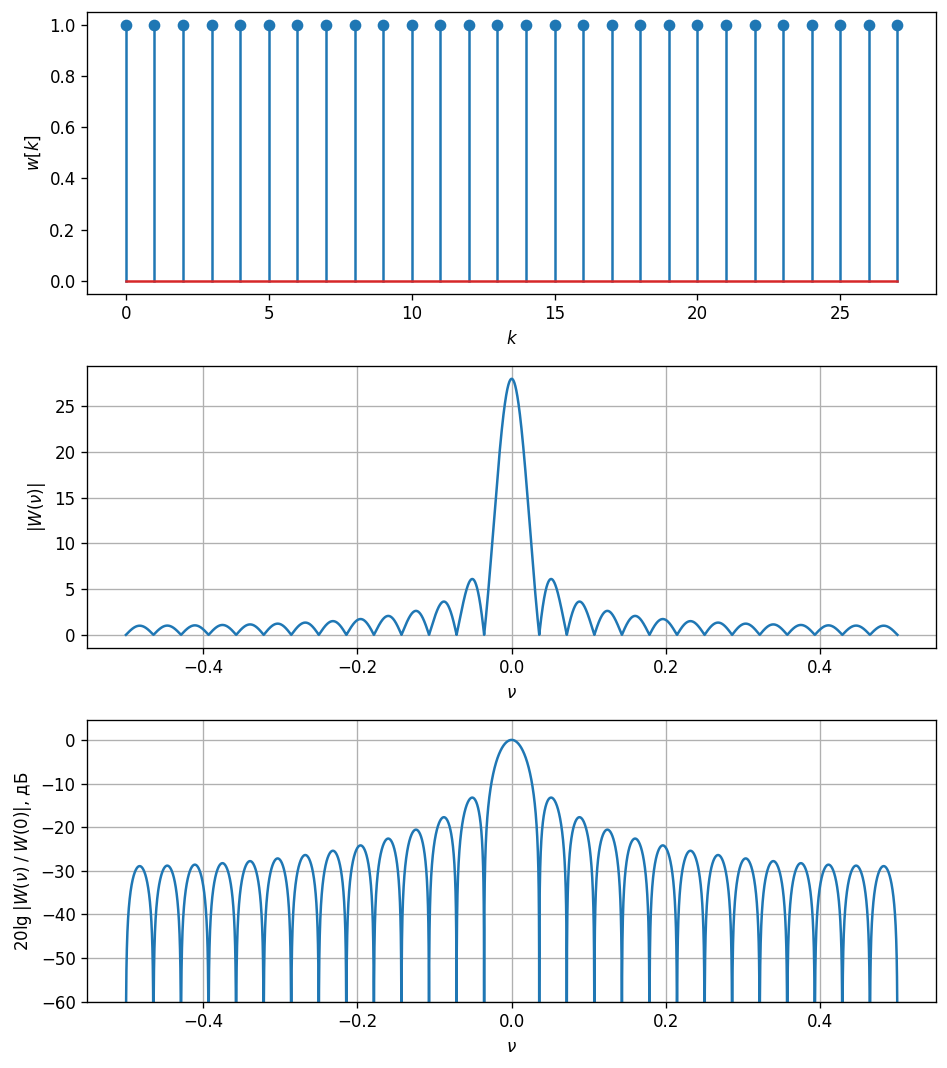

In [26]:
# Прямоугольное окно
w=signal.windows.boxcar(M=N, sym=False)
nu, db = plotTriple(w)

ll = get_list_db_levl(db, N=10)
x = np.array(list(map(lambda el: nu[el], ll)))
y = np.array(list(map(lambda el: db[el], ll)))
p = np.poly1d(np.polyfit(x, y, 2))

print("ширина главного лепестка", round(nu[get_main_width(db)] * 2, 4))
print("максимальный уровень боковых лепестков относительно главного в дБ", round(db[get_list_db_levl(db)[0]], 4))
print("асимптотическую скорость спада боковых лепестков в дБ/октава", round(p(0.1) - p(0.2), 4))

### Окно Бартлетта

$$
w[k]=\left\{\begin{array}{l}
1-\dfrac{2|k-N/2|}{N}, \; 0 \leq k < N,
\\
0, \{k<0\} \cup \{k\geq N\};
\end{array}\right.
$$

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:31: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:44: RuntimeWarning: divide by zero encountered in log10


ширина главного лепестка 0.1429
максимальный уровень боковых лепестков относительно главного в дБ -26.2234
асимптотическую скорость спада боковых лепестков в дБ/октава 9.7482


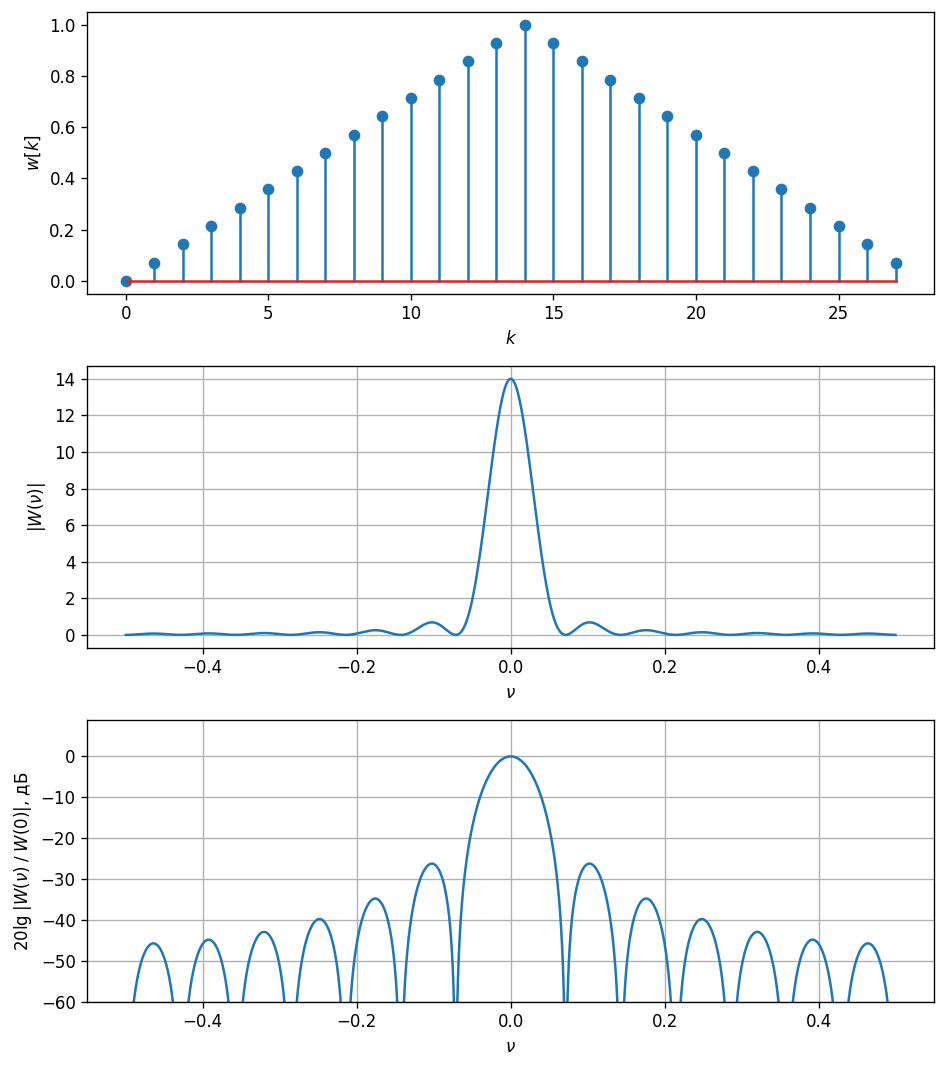

In [27]:
# Окно Бартлетта
w=signal.windows.bartlett(M=N, sym=False)
nu, db = plotTriple(w)

ll = get_list_db_levl(db, N=6)
x = np.array(list(map(lambda el: nu[el], ll)))
y = np.array(list(map(lambda el: db[el], ll)))
p = np.poly1d(np.polyfit(x, y, 2))

print("ширина главного лепестка", round(nu[get_main_width(db)] * 2, 4))
print("максимальный уровень боковых лепестков относительно главного в дБ", round(db[get_list_db_levl(db)[0]], 4))
print("асимптотическую скорость спада боковых лепестков в дБ/октава", round(p(0.1) - p(0.2), 4))

### Окно Ханна

$$
w[k]=\left\{\begin{array}{l}
\dfrac{1}{2} (1-\cos\dfrac{2\pi k}{N}), \; 0 \leq k < N,
\\
0, \{k<0\} \cup \{k\geq N\};
\end{array}\right.
$$

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:31: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:44: RuntimeWarning: divide by zero encountered in log10


ширина главного лепестка 0.1429
максимальный уровень боковых лепестков относительно главного в дБ -26.2234
асимптотическую скорость спада боковых лепестков в дБ/октава 9.3907


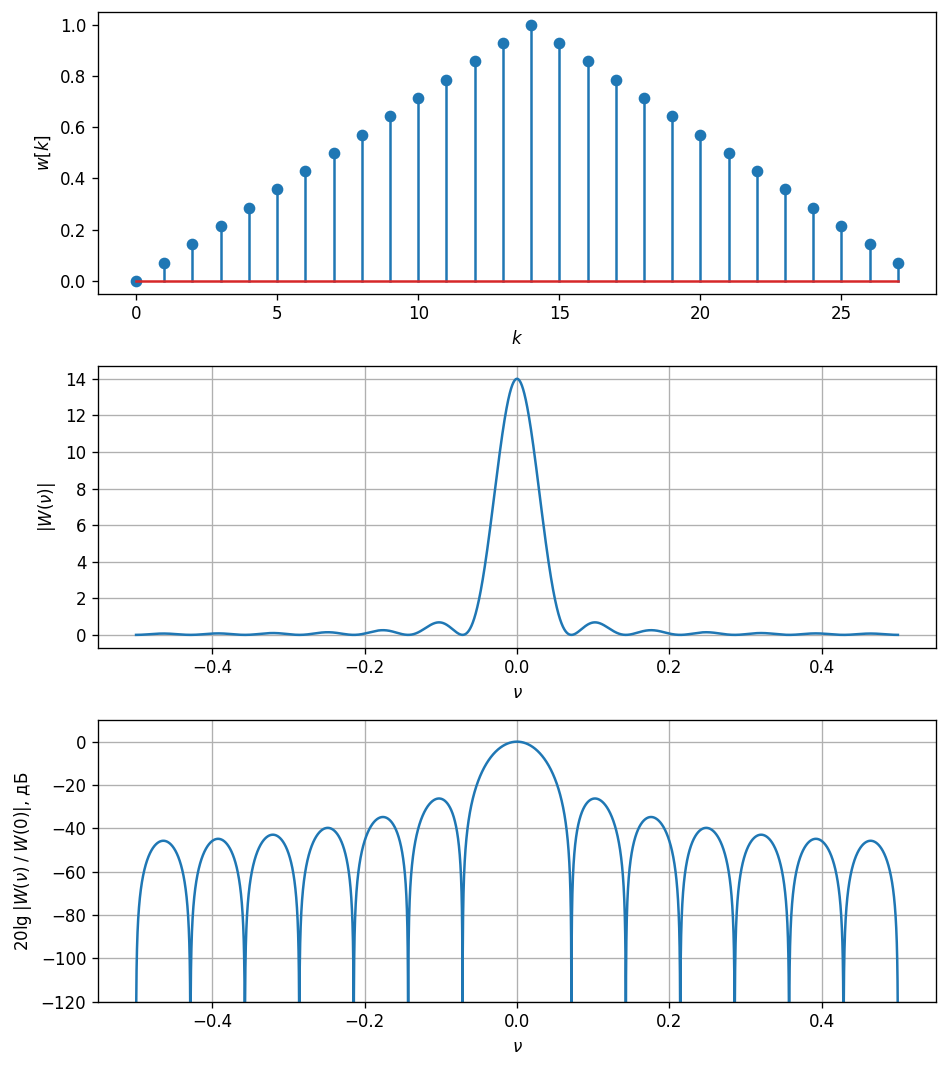

In [28]:
# Окно Ханна

nu, db = plotTriple(w, db_ylim=(-120, 10))

ll = get_list_db_levl(db, N=10)
x = np.array(list(map(lambda el: nu[el], ll)))
y = np.array(list(map(lambda el: db[el], ll)))
p = np.poly1d(np.polyfit(x, y, 2))

print("ширина главного лепестка", round(nu[get_main_width(db)] * 2, 4))
print("максимальный уровень боковых лепестков относительно главного в дБ", round(db[get_list_db_levl(db)[0]], 4))
print("асимптотическую скорость спада боковых лепестков в дБ/октава", round(p(0.2) - p(0.4), 4))

#### Окно Хэмминга

$$
w[k]=\left\{\begin{array}{l}
0.54-0.46\cos\dfrac{2\pi k}{N}, \; 0 \leq k < N,
\\
0, \{k<0\} \cup \{k\geq N\};
\end{array}\right.
$$

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:31: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:44: RuntimeWarning: divide by zero encountered in log10


ширина главного лепестка 0.1429
максимальный уровень боковых лепестков относительно главного в дБ -42.5275
асимптотическую скорость спада боковых лепестков в дБ/октава 2.941


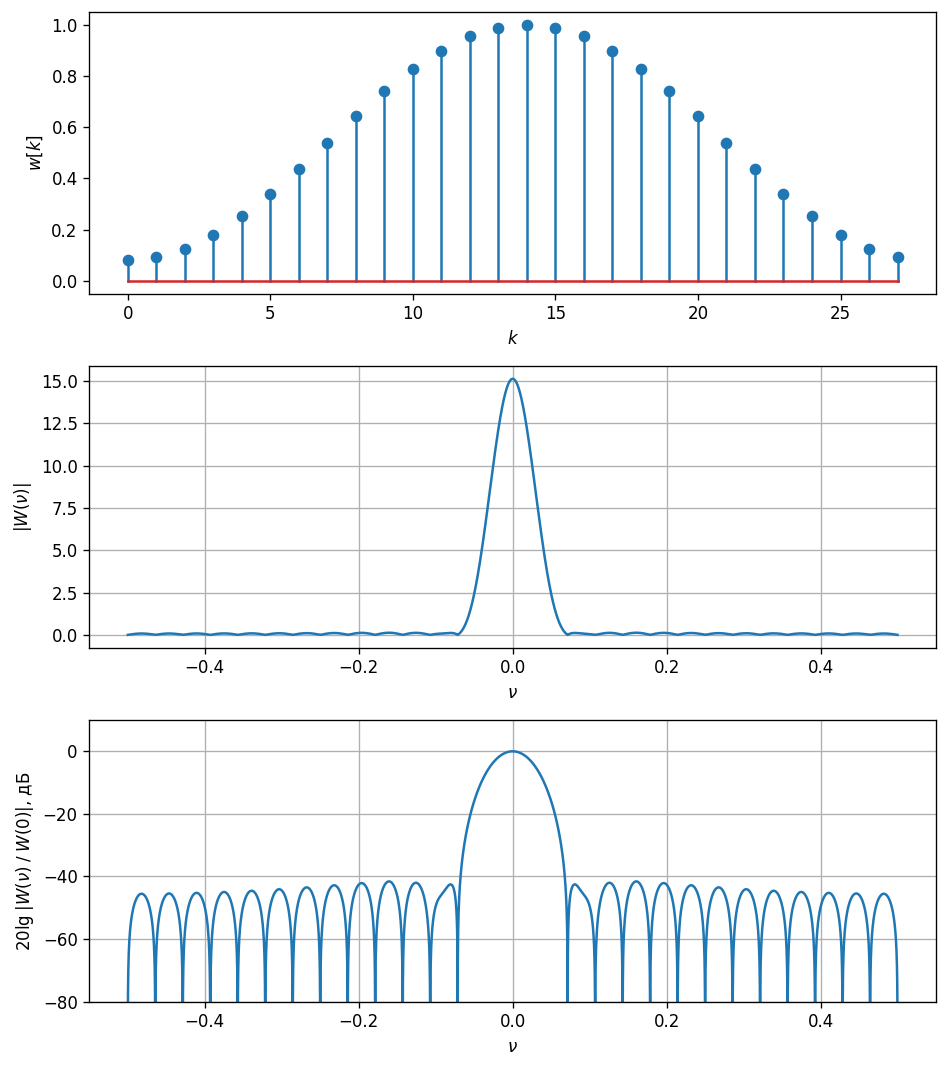

In [29]:
# Окно Хэмминга
w=signal.windows.hamming(M=N, sym=False)
nu, db = plotTriple(w, db_ylim=(-80, 10))

ll = get_list_db_levl(db, N=10)
x = np.array(list(map(lambda el: nu[el], ll)))
y = np.array(list(map(lambda el: db[el], ll)))
p = np.poly1d(np.polyfit(x, y, 4))

print("ширина главного лепестка", round(nu[get_main_width(db)] * 2, 4))
print("максимальный уровень боковых лепестков относительно главного в дБ", round(db[get_list_db_levl(db)[0]], 4))
print("асимптотическую скорость спада боковых лепестков в дБ/октава", round(p(0.2) - p(0.4), 4))

### Окно Блэкмана

$$
w[k]=\left\{\begin{array}{l}
0.42-0.5\cos\dfrac{2\pi k}{N}+0.08\cos\dfrac{4\pi k}{N}, \; 0 \leq k < N,
\\
0, \{k<0\} \cup \{k\geq N\};
\end{array}\right.
$$

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:31: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.


ширина главного лепестка 0.2144
максимальный уровень боковых лепестков относительно главного в дБ -96.1057
асимптотическую скорость спада боковых лепестков в дБ/октава 23.4031


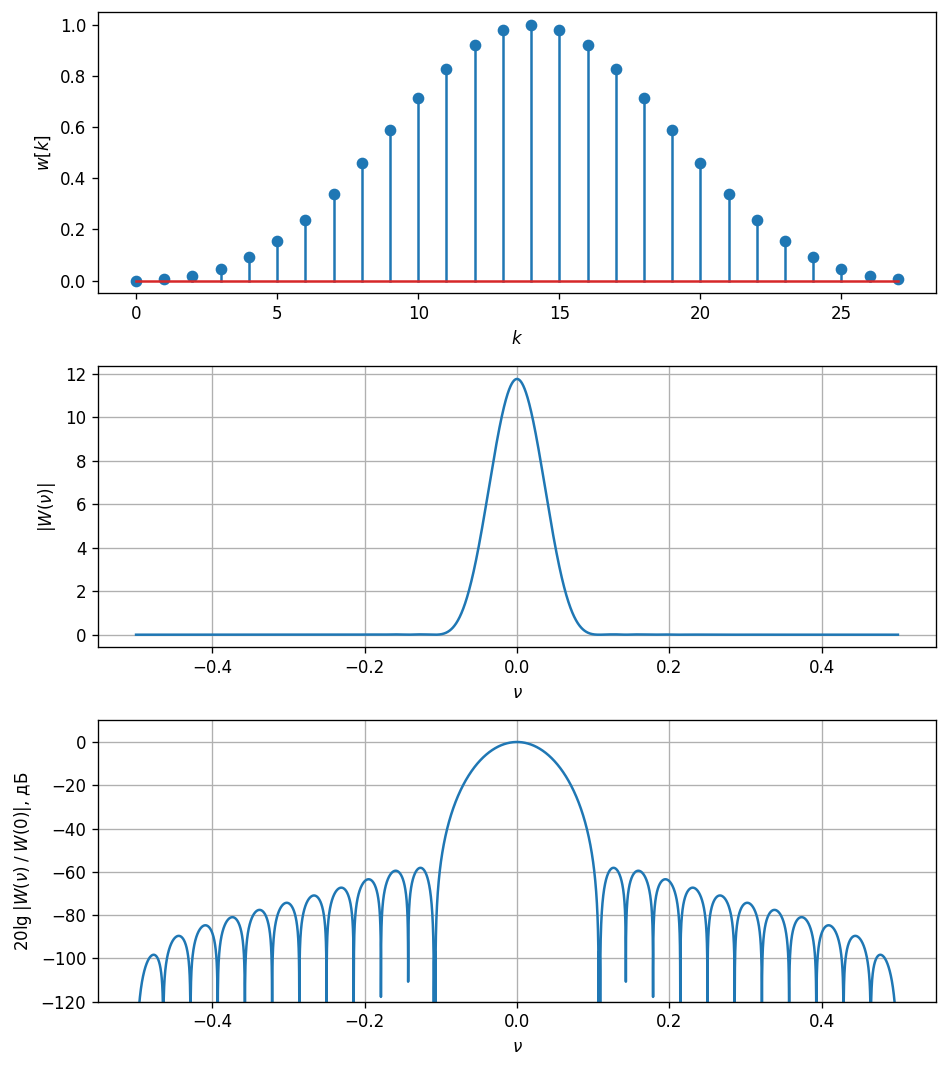

In [30]:
# Окно Блэкмана
w=signal.windows.blackman(M=N, sym=False)
nu, db = plotTriple(w, db_ylim=(-120, 10))

ll = get_list_db_levl(db, N=10)
x = np.array(list(map(lambda el: nu[el], ll)))
y = np.array(list(map(lambda el: db[el], ll)))
p = np.poly1d(np.polyfit(x, y, 4))

print("ширина главного лепестка", round(nu[get_main_width(db)] * 2, 4))
print("максимальный уровень боковых лепестков относительно главного в дБ", round(db[get_list_db_levl(db)[0]], 4))
print("асимптотическую скорость спада боковых лепестков в дБ/октава", round(p(0.2) - p(0.4), 4))

### Окна с плоской вершиной
Как было показано ранее, форма главного лепестка оконной функции приводит к искажению амплитуд гармоник, частоты которых не соответствуют бинам ДПФ. Если требуется уменьшить этот эффект, то следует использовать окна с плоской вершиной. 
Приведем пример такого окна, который часто используется:
$${{w}_{flattop}}[k]=\left\{ \begin{array}{*{35}{l}}
   \sum\limits_{r=0}^{4}{{{(-1)}^{r}}{{a}_{r}}}\cos \left( \frac{2\pi }{N}rk \right), & \text{ }0\le k\le N-1,  \\
   0, & \text{при других  }k,  \\
\end{array} \right.$$
где ${{a}_{0}}=0,21557895$, ${{a}_{1}}=0,41663158$, ${{a}_{2}}=0,277263158$, ${{a}_{3}}=0,083578947$, ${{a}_{4}}=0,006947368.$ Заметим, что временная функция ${{w}_{flattop}}[k]$ может принимать отрицательные значения.  

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:31: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:44: RuntimeWarning: divide by zero encountered in log10


ширина главного лепестка 0.3573
максимальный уровень боковых лепестков относительно главного в дБ -83.0933
асимптотическую скорость спада боковых лепестков в дБ/октава 0.1096


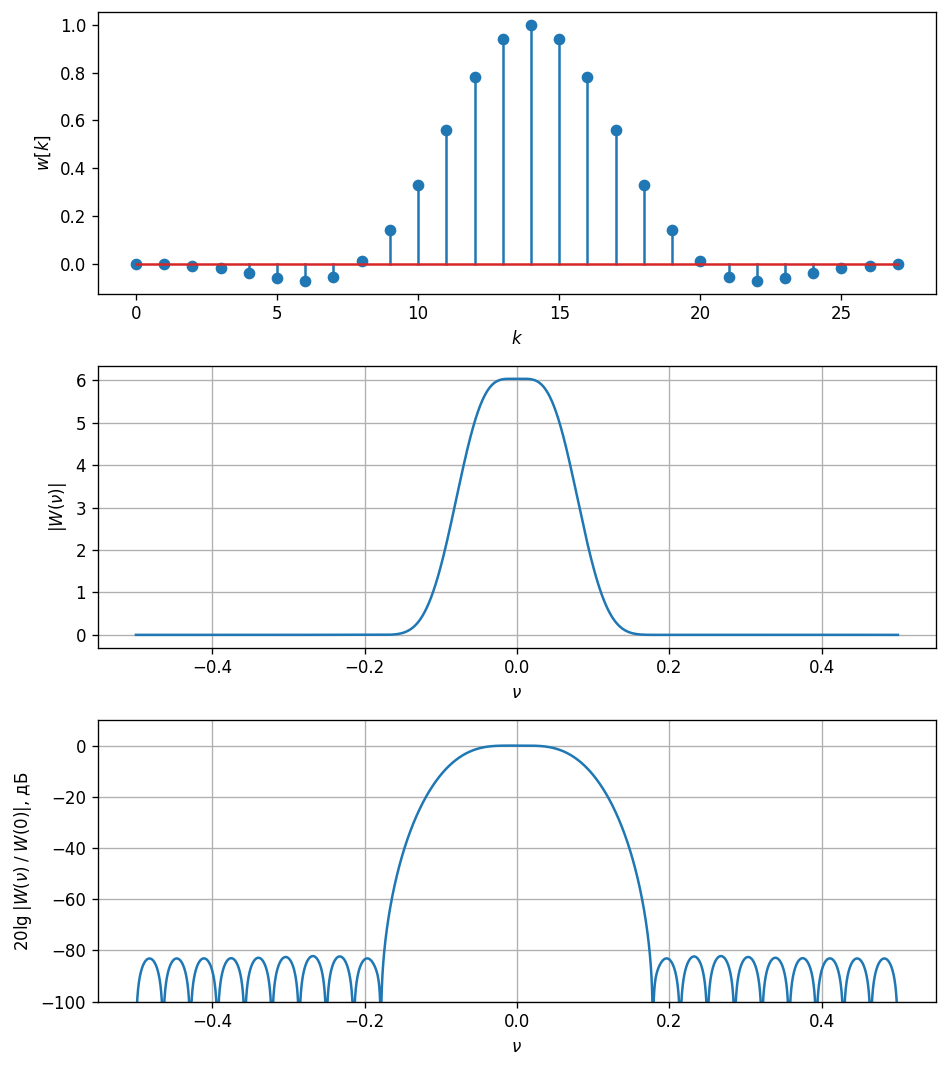

In [31]:
# Окна с плоской вершиной
w=scipy.signal.windows.flattop(M=N, sym=False)
nu, db = plotTriple(w, db_ylim=(-100, 10))

ll = get_list_db_levl(db, N=8)
x = np.array(list(map(lambda el: nu[el], ll)))
y = np.array(list(map(lambda el: db[el], ll)))
p = np.poly1d(np.polyfit(x, y, 4))

print("ширина главного лепестка", round(nu[get_main_width(db)] * 2, 4))
print("максимальный уровень боковых лепестков относительно главного в дБ", round(db[get_list_db_levl(db)[0]], 4))
print("асимптотическую скорость спада боковых лепестков в дБ/октава", round(p(0.2) - p(0.4), 4))

## Задача 2.2. Окно Кайзера.
Повторите вычисления задачи 2.1 для окна Кайзера с параметром $\beta =0;\ \ 5;\ \ 6;\ \ 8,6$. Сравните полученные результаты с предыдущей задачей. 


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:31: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:44: RuntimeWarning: divide by zero encountered in log10


ширина главного лепестка 0.0715
максимальный уровень боковых лепестков относительно главного в дБ -13.2245
асимптотическую скорость спада боковых лепестков в дБ/октава 3.8865


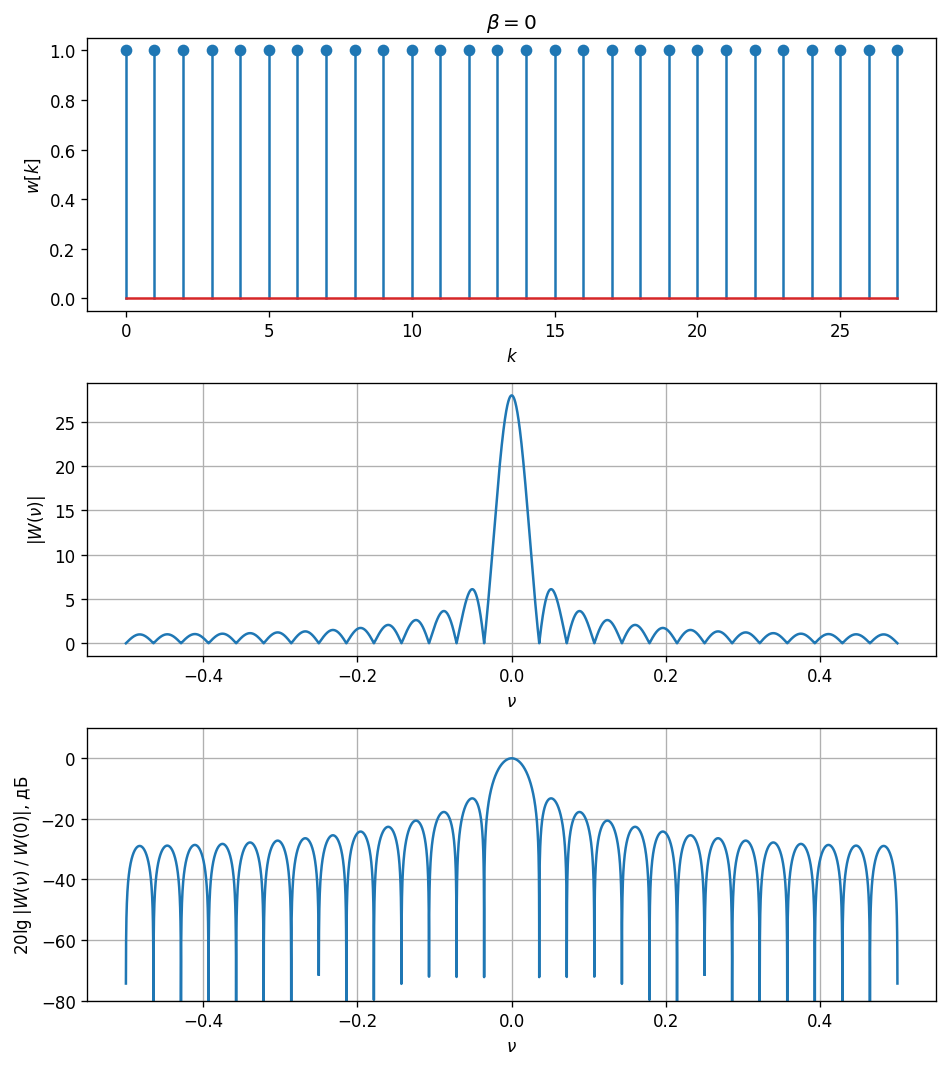

In [32]:
w=scipy.signal.windows.kaiser(M=N, beta=0, sym=False)
nu, db1 = plotTriple(w, title='$\\beta = 0$', db_ylim=(-80, 10))

ll1 = get_list_db_levl(db1, N=10)
x = np.array(list(map(lambda el: nu[el], ll1)))
y = np.array(list(map(lambda el: db1[el], ll1)))
p = np.poly1d(np.polyfit(x, y, 4))

print("ширина главного лепестка", round(nu[get_main_width(db1)] * 2, 4))
print("максимальный уровень боковых лепестков относительно главного в дБ", round(db1[ll1[0]], 4))
print("асимптотическую скорость спада боковых лепестков в дБ/октава", round(p(0.2) - p(0.4), 4))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:31: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.


ширина главного лепестка 0.1343
максимальный уровень боковых лепестков относительно главного в дБ -36.429
асимптотическую скорость спада боковых лепестков в дБ/октава 7.8842


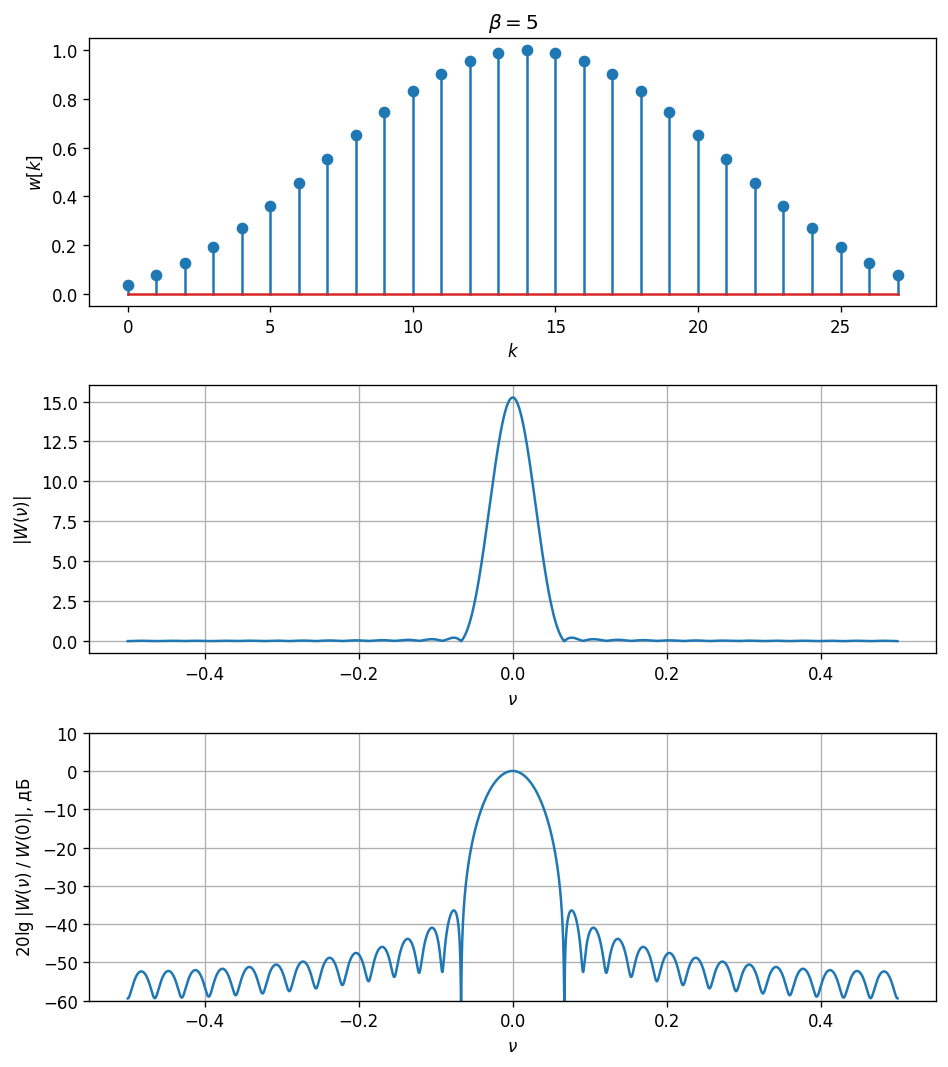

In [33]:
w=scipy.signal.windows.kaiser(M=N, beta=5, sym=False)
nu, db2 = plotTriple(w, title='$\\beta = 5$', db_ylim=(-60, 10))

ll2 = get_list_db_levl(db2, N=8)
x = np.array(list(map(lambda el: nu[el], ll2)))
y = np.array(list(map(lambda el: db2[el], ll2)))
p = np.poly1d(np.polyfit(x, y, 2))

print("ширина главного лепестка", round(nu[get_main_width(db2)] * 2, 4))
print("максимальный уровень боковых лепестков относительно главного в дБ", round(db2[ll2[0]], 4))
print("асимптотическую скорость спада боковых лепестков в дБ/октава", round(p(0.1) - p(0.2), 4))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:31: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.


ширина главного лепестка 0.1538
максимальный уровень боковых лепестков относительно главного в дБ -58.0367
асимптотическую скорость спада боковых лепестков в дБ/октава 0.4656


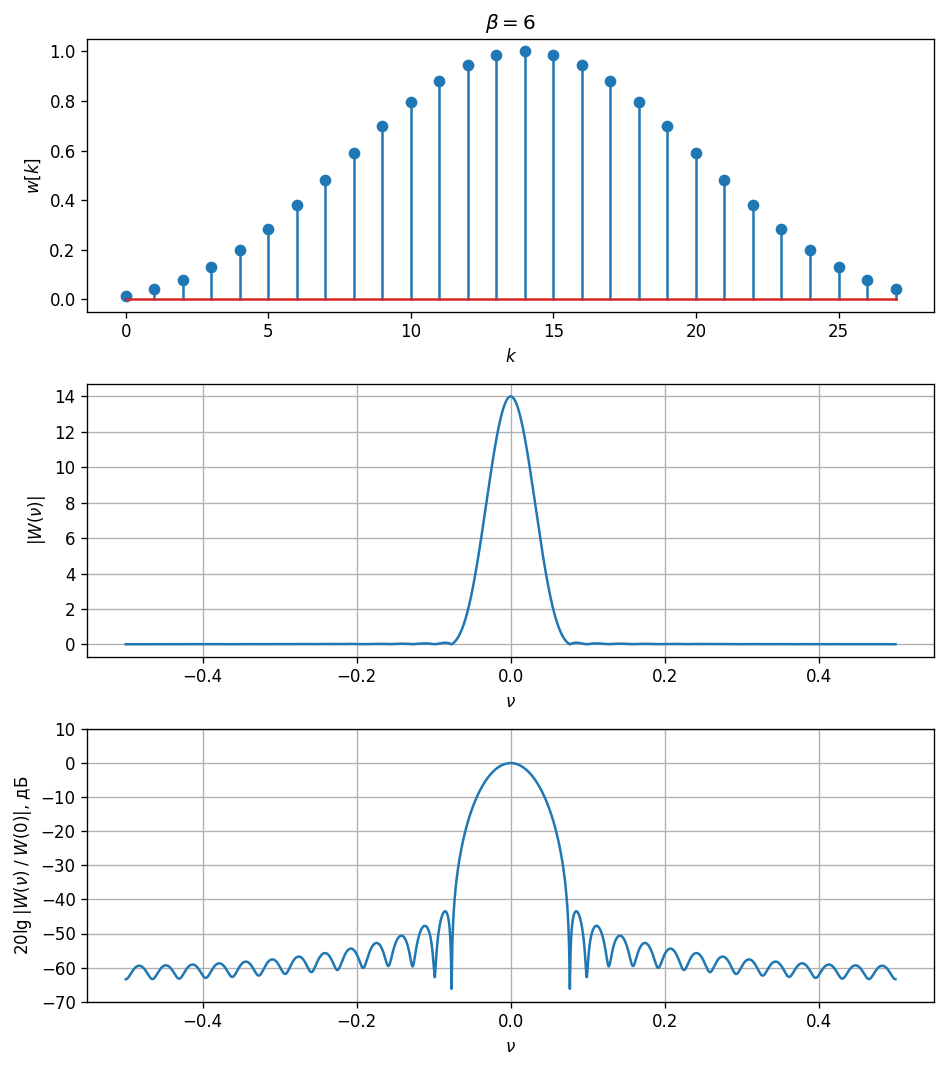

In [34]:
w=scipy.signal.windows.kaiser(M=N, beta=6, sym=False)
nu, db3 = plotTriple(w, title='$\\beta = 6$', db_ylim=(-70, 10))

ll3 = get_list_db_levl(db, N=8)
x = np.array(list(map(lambda el: nu[el], ll3)))
y = np.array(list(map(lambda el: db3[el], ll3)))
p = np.poly1d(np.polyfit(x, y, 2))

print("ширина главного лепестка", round(nu[get_main_width(db3)] * 2, 4))
print("максимальный уровень боковых лепестков относительно главного в дБ", round(db3[ll3[0]], 4))
print("асимптотическую скорость спада боковых лепестков в дБ/октава", round(p(0.1) - p(0.2), 4))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:31: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.


ширина главного лепестка 0.2086
максимальный уровень боковых лепестков относительно главного в дБ -63.9144
асимптотическую скорость спада боковых лепестков в дБ/октава 7.4922


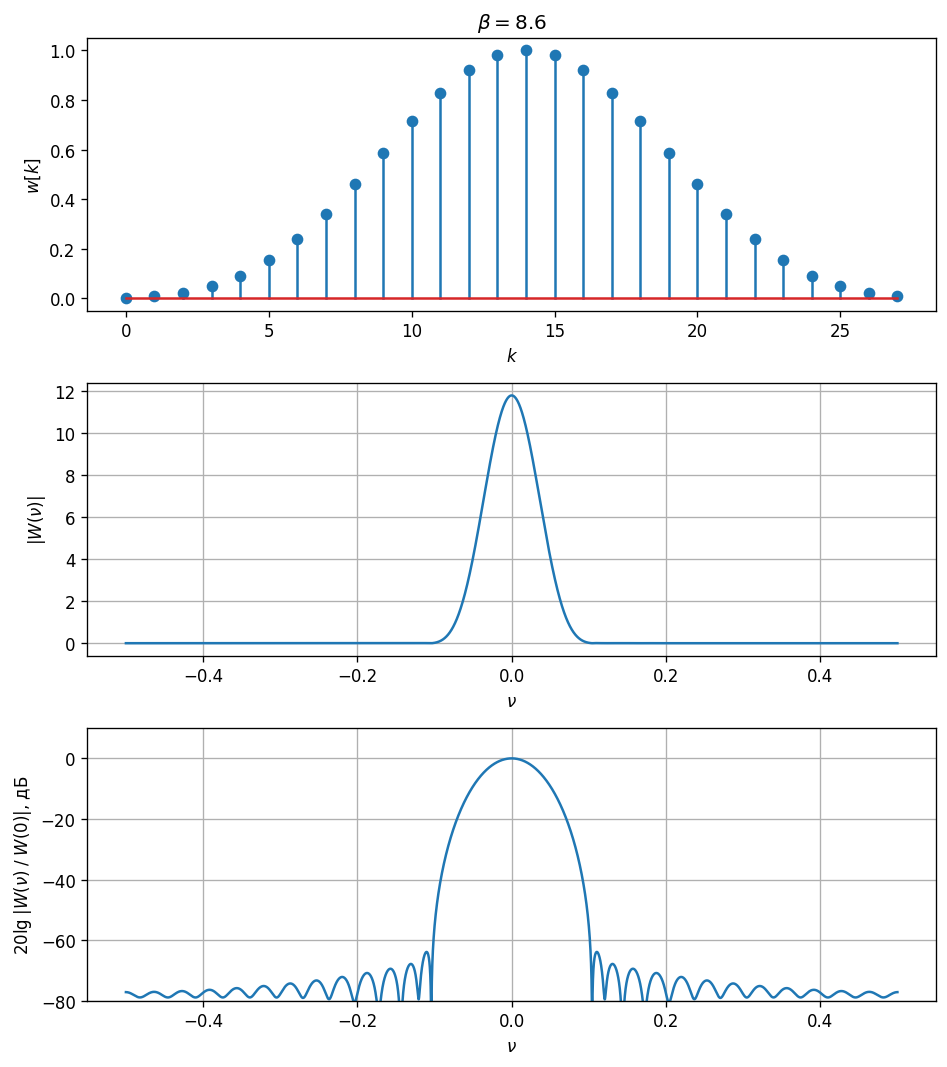

In [35]:
w=scipy.signal.windows.kaiser(M=N, beta=8.6, sym=False)
nu, db4 = plotTriple(w, title='$\\beta = 8.6$', db_ylim=(-80, 10))

ll4 = get_list_db_levl(db4, N=8)
x = np.array(list(map(lambda el: nu[el], ll4)))
y = np.array(list(map(lambda el: db4[el], ll4)))
p = np.poly1d(np.polyfit(x, y, 2))

print("ширина главного лепестка", round(nu[get_main_width(db4)] * 2, 4))
print("максимальный уровень боковых лепестков относительно главного в дБ", round(db4[ll4[0]], 4))
print("асимптотическую скорость спада боковых лепестков в дБ/октава", round(p(0.1) - p(0.2), 4))

## Задача 2.3. Окно Чебышева.
Получите окно Чебышева для четырех уровней боковых лепестков, которые получились в задаче 2.2. Сравните ширину главного лепестка на уровне половинной мощности с результатами предыдущих задач. 


/usr/local/lib/python3.7/dist-packages/scipy/signal/windows/windows.py:1439: UserWarning: This window is not suitable for spectral analysis for attenuation values lower than about 45dB because the equivalent noise bandwidth of a Chebyshev window does not grow monotonically with increasing sidelobe attenuation when the attenuation is smaller than about 45 dB.
  warnings.warn("This window is not suitable for spectral analysis "
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:31: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:44: RuntimeWarning: divide by zero encountered in log10


ширина главного лепестка 0.0638
максимальный уровень боковых лепестков относительно главного в дБ -13.225


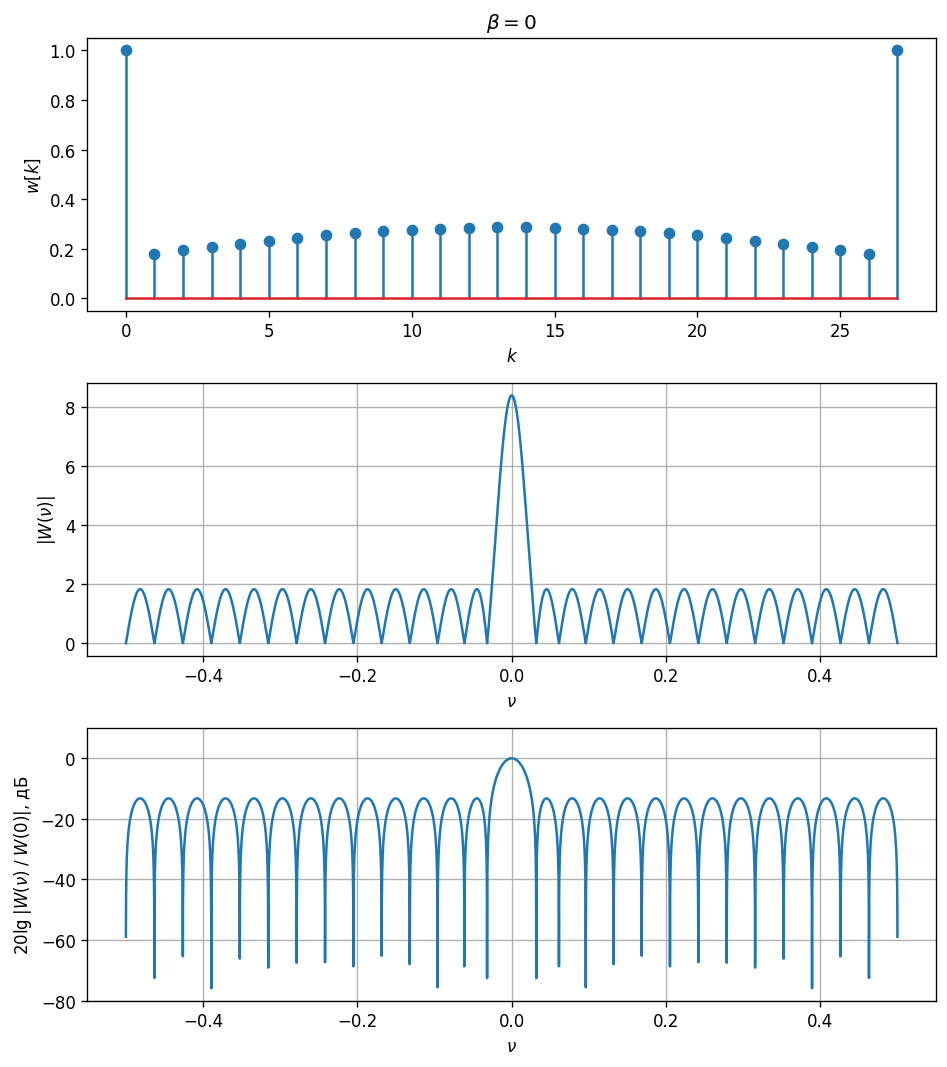

In [36]:
w=signal.windows.chebwin(M=N, at=abs(db1[ll1[0]]), sym=True)
nu, db = plotTriple(w, title='$\\beta = 0$', db_ylim=(-80, 10))

ll = get_list_db_levl(db, N=8)
x = np.array(list(map(lambda el: nu[el], ll)))
y = np.array(list(map(lambda el: db[el], ll)))
p = np.poly1d(np.polyfit(x, y, 2))

print("ширина главного лепестка", round(nu[get_main_width(db)] * 2, 4))
print("максимальный уровень боковых лепестков относительно главного в дБ", round(db[ll[0]], 4))

/usr/local/lib/python3.7/dist-packages/scipy/signal/windows/windows.py:1439: UserWarning: This window is not suitable for spectral analysis for attenuation values lower than about 45dB because the equivalent noise bandwidth of a Chebyshev window does not grow monotonically with increasing sidelobe attenuation when the attenuation is smaller than about 45 dB.
  warnings.warn("This window is not suitable for spectral analysis "
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:31: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:44: RuntimeWarning: divide by zero encountered in log10


ширина главного лепестка 0.1205
максимальный уровень боковых лепестков относительно главного в дБ -36.4304


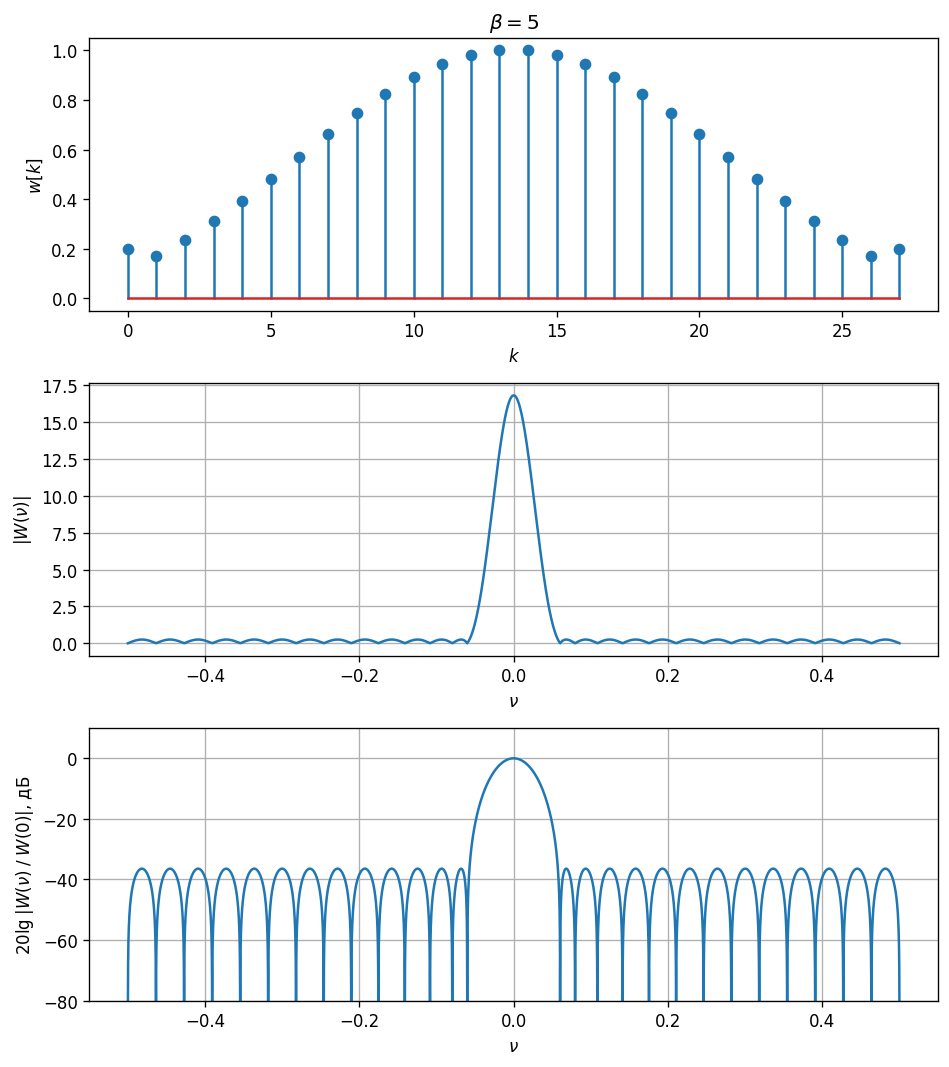

In [37]:
w=signal.windows.chebwin(M=N, at=abs(db2[ll2[0]]), sym=True)
nu, db = plotTriple(w, title='$\\beta = 5$', db_ylim=(-80, 10))

ll = get_list_db_levl(db, N=8)
x = np.array(list(map(lambda el: nu[el], ll)))
y = np.array(list(map(lambda el: db[el], ll)))
p = np.poly1d(np.polyfit(x, y, 2))

print("ширина главного лепестка", round(nu[get_main_width(db)] * 2, 4))
print("максимальный уровень боковых лепестков относительно главного в дБ", round(db[ll[0]], 4))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:31: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:44: RuntimeWarning: divide by zero encountered in log10


ширина главного лепестка 0.1758
максимальный уровень боковых лепестков относительно главного в дБ -58.0385


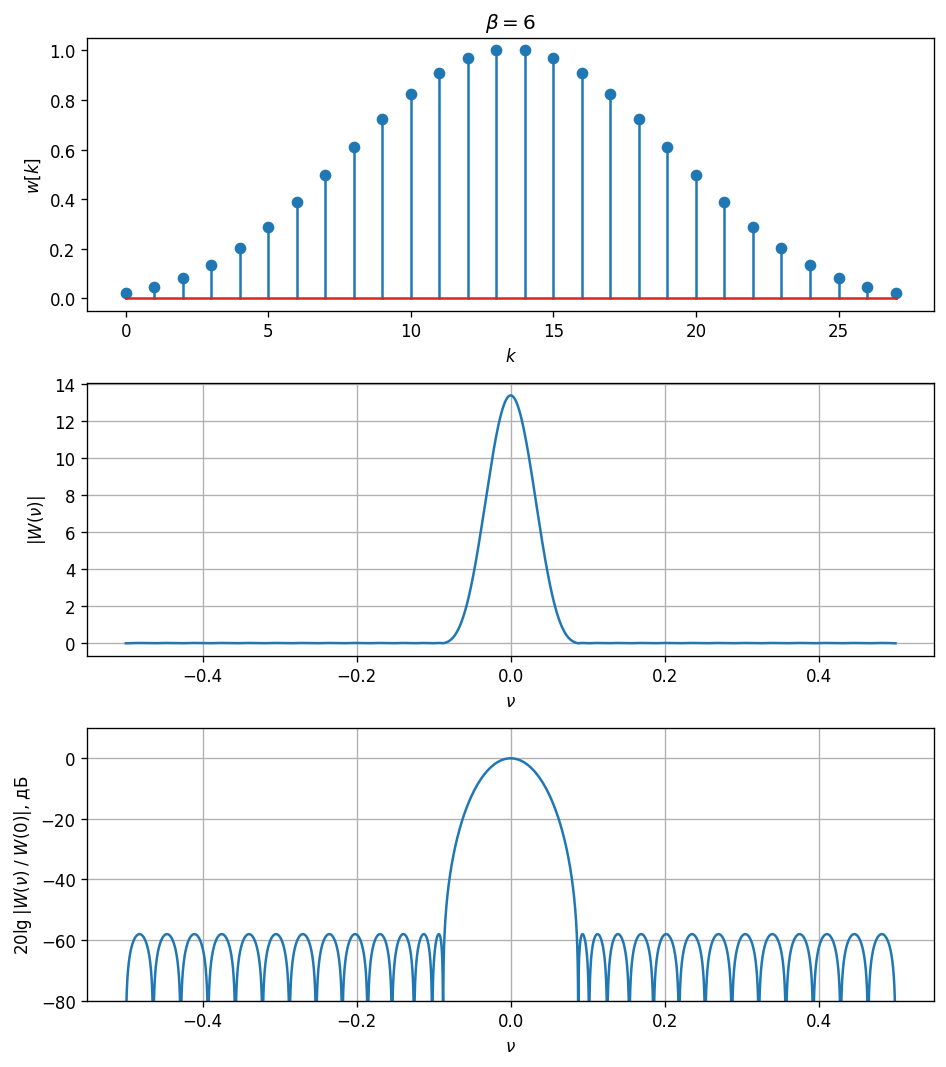

In [38]:
w=signal.windows.chebwin(M=N, at=abs(db3[ll3[0]]), sym=True)
nu, db = plotTriple(w, title='$\\beta = 6$', db_ylim=(-80, 10))

ll = get_list_db_levl(db, N=8)
x = np.array(list(map(lambda el: nu[el], ll)))
y = np.array(list(map(lambda el: db[el], ll)))
p = np.poly1d(np.polyfit(x, y, 2))

print("ширина главного лепестка", round(nu[get_main_width(db)] * 2, 4))
print("максимальный уровень боковых лепестков относительно главного в дБ", round(db[ll[0]], 4))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:31: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:44: RuntimeWarning: divide by zero encountered in log10


ширина главного лепестка 0.1908
максимальный уровень боковых лепестков относительно главного в дБ -63.9175


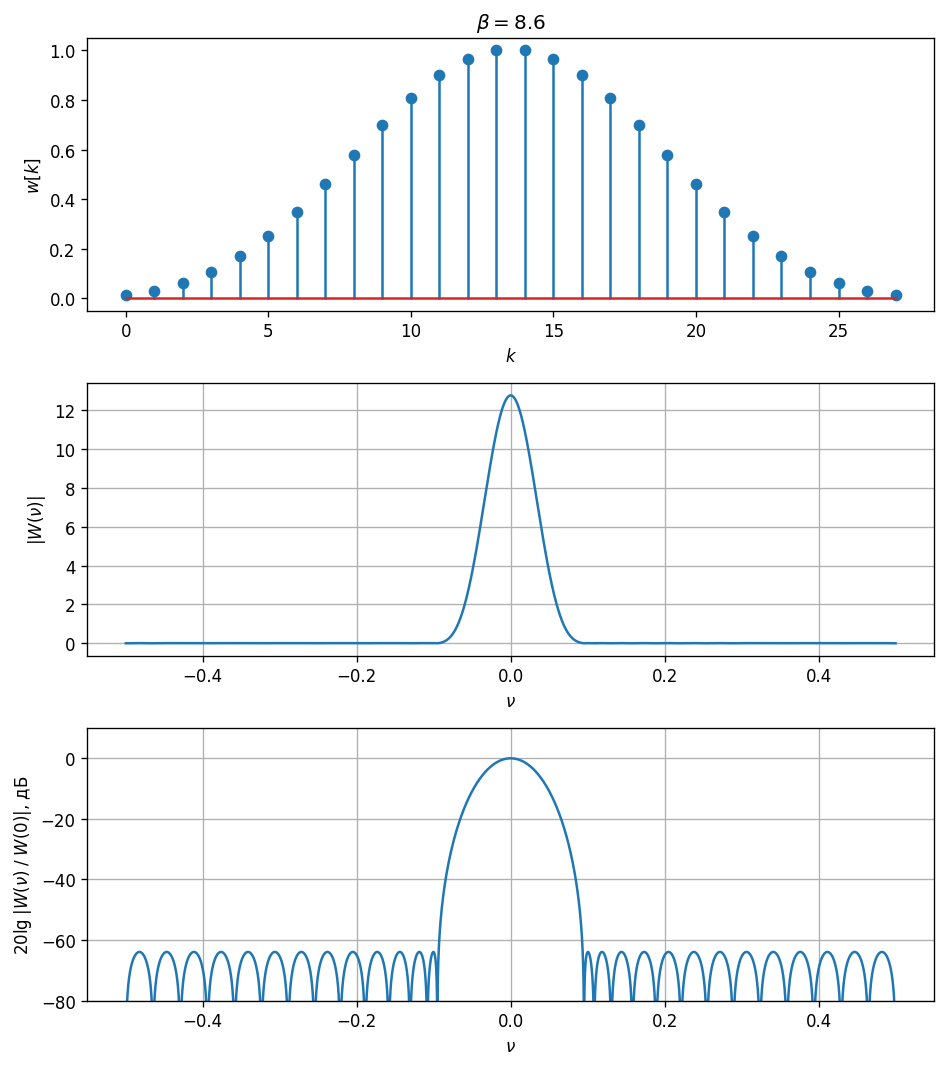

In [39]:
w=signal.windows.chebwin(M=N, at=abs(db4[ll4[0]]), sym=True)
nu, db = plotTriple(w, title='$\\beta = 8.6$', db_ylim=(-80, 10))

ll = get_list_db_levl(db, N=8)
x = np.array(list(map(lambda el: nu[el], ll)))
y = np.array(list(map(lambda el: db[el], ll)))
p = np.poly1d(np.polyfit(x, y, 2))

print("ширина главного лепестка", round(nu[get_main_width(db)] * 2, 4))
print("максимальный уровень боковых лепестков относительно главного в дБ", round(db[ll[0]], 4))

## Задача 2.4. Различимость спектральных компонент.

| Варианты: | 1 | 2 | 3 | 4 | 5 | 6 | 7 | 8 | 9 | 10 | 11 | 12 |
|:--:|:--:|:--:|:--:|:--:|:--:|:--:|:--:|:--:|:--:|:--:|:--:|:--:|
|$n_0$|11 | 15 | 18 | 17 | 32 | 48 | 15 | 18 | 47 | 32 | 40 | 38 |
|$\beta_0$| 1.1| 1.5 | 1.2 | 1.5 | 1.1 | 1.3 | 1.1 | 1.4 | 1.5 | 1.3 | 1.2 | 1.1 |
|$\beta_1$| 5 | 5.5 | 6.2 | 5.7 | 6.1 | 4.9 | 5.1 | 5.7 | 6 | 5.8 | 5.7 | 5.5 |

Произведите спектральный анализ с помощью ДПФ размерности $M=2048$ последовательности 
$$x[k]=\cos\left(2\pi \dfrac{n_0}{128} k\right)+ \cos\left(2\pi \dfrac{n_0+2}{128} k\right)$$
 со взвешиванием следующими оконными функциями длиной 128 отчетов:
 
 а) окном Кайзера с параметром $\beta=\beta_0.$,

 б) окном Кайзера с параметром $\beta=\beta_1.$
 
 в) окном Блэкмана.
 
Значения параметров $n_0$ и $\beta=\beta_1$ определите из таблицы. Ответьте на следующие вопросы.
 
1) Для каких оконных функций гармонические компоненты оказались различимы и почему?

2) Как влияет максимальный уровень боковых лепестков оконной функции на результат спектрального анализа? 


In [40]:
n0 = 17
b0 = 1.5
b1 = 5.7

N = 128
k = np.arange(N)
x = np.cos(2 * np.pi * k * n0 / N) + np.cos(2 * np.pi * k * (n0 + 2) / N)

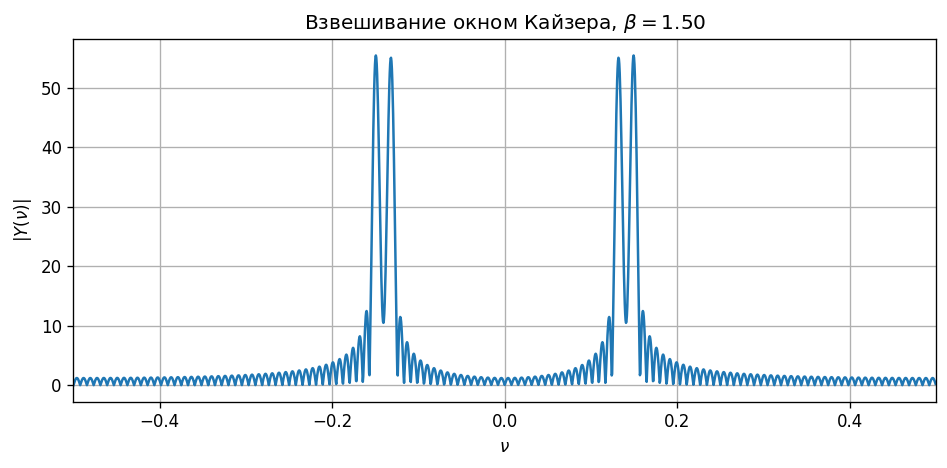

In [41]:
y = x * signal.windows.kaiser(M=N, beta=b0, sym=False)
nu, Xn = DTFT(y)

plt.figure(figsize=[8, 4], dpi=120)
plt.title('Взвешивание окном Кайзера, $\\beta=$%.2f' % b0)
plt.plot(nu, abs(Xn))
plt.xlabel('$\\nu$')
plt.ylabel('$|Y(\\nu)|$')
plt.xlim([-0.5, 0.5])
plt.grid()
plt.tight_layout()

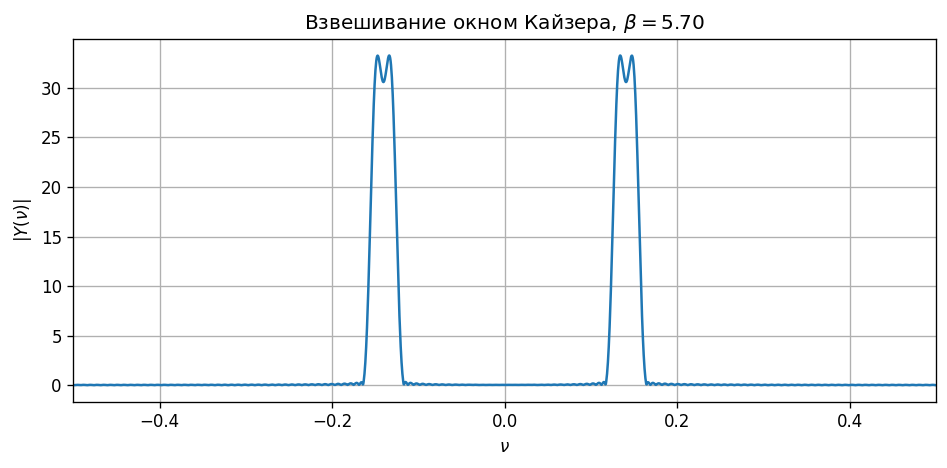

In [42]:
y = x * signal.windows.kaiser(M=N, beta=b1, sym=False)
nu, Xn = DTFT(y)

plt.figure(figsize=[8, 4], dpi=120)
plt.title('Взвешивание окном Кайзера, $\\beta=$%.2f' % b1)
plt.plot(nu, abs(Xn))
plt.xlabel('$\\nu$')
plt.ylabel('$|Y(\\nu)|$')
plt.xlim([-0.5, 0.5])
plt.grid()
plt.tight_layout()

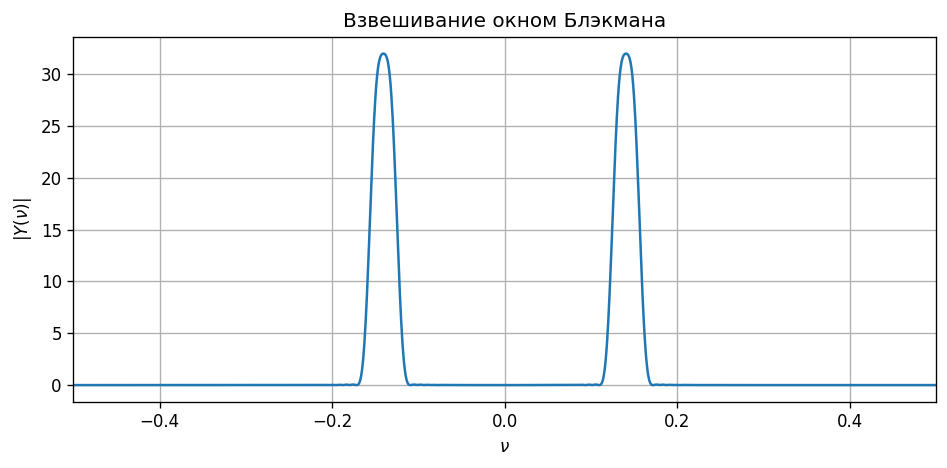

In [43]:
y = x * signal.windows.blackman(M=N, sym=False)
nu, Xn = DTFT(y)

plt.figure(figsize=[8, 4], dpi=120)
plt.title('Взвешивание окном Блэкмана')
plt.plot(nu, abs(Xn))
plt.xlabel('$\\nu$')
plt.ylabel('$|Y(\\nu)|$')
plt.xlim([-0.5, 0.5])
plt.grid()
plt.tight_layout()

## Задача 2.5. Маскировка слабой гармоники боковыми лепестками окна.


| Варианты: |       1      |     2     |         3        |      4     |        5        |        6       |
|:---------:|:------------:|:---------:|:----------------:|:----------:|:---------------:|:--------------:|
| $w_1[k]$ | Бартлетта | Ханна | Хэмминга | Ханна | Бартлетта | Хэмминга |
| $m_2$ |    -2     |     2    |   -2    |     2    |   -2    |     2    |
| $m_3$ |     4     |     6    |    3    |     4    |    5    |     7    |


| Варианты: |       7      |     8     |         9        |      10     |        11       |        12       |
|:---------:|:------------:|:---------:|:----------------:|:----------:|:---------------:|:--------------:|
| $w_1[k]$ | Хэмминга | Ханна | Бартлетта | Ханна | Хэмминга | Бартлетта |
| $m_2$ |      2     |   -2    |     2    |   -2    |     2    |   -2    |
| $m_3$ |      7     |    3    |    -3    |   -4    |     5    |    4    |

Сгенерировать последовательность отсчетов гармонического сигнала $x[k]$ длительностью $N=64$, которая может быть описана следующей формулой:
$$x[k]=a_1 \sin\left(2\pi k \frac{n}{N}\right) + a_2 \cos\left(2\pi k \frac{n+m_2}{N}\right) - a_3\sin\left(2\pi k \frac{n+m_3}{N}\right),$$
где $a_1 = n = n_\text{v}+10$ ($n_\text{v}$ — номер вашего варианта), $a_2 = \dfrac{a_1}{6}$, $a_3 = \dfrac{a_1}{2}$, $m_2$  и  $m_3$  значения из таблицы, соответствующие вашему варианту.

* Построить ДВПФ $x[k]$, применив прямоугольное окно. Сколько гармонических компонент можно выделить?

* Построить ДВПФ $x[k]$, применив окно Блэкмана. Какие гармонические компоненты наблюдаются теперь?

* Построить ДВПФ $x[k]$, используя окно $w_1[k]$ из вашего варианта. Получилось ли пронаблюдать все гармонические компоненты?

* Подобрать коэффиценты для окон Чебышева и Кайзера так, чтобы возможно было наблюдать все гармонические компоненты. Построить соответствующие графики.**

In [44]:
N = 64
w = signal.windows.hann(M=N, sym=False)
m2 = 2
m3 = 4
nv = 4 # вариант

n = nv + 10
a1 = n
a2 = a1 / 6
a3 = a1 / 2
k = np.arange(N)
x = (a1 * np.sin(2 * np.pi * k * n / N) 
    + a2 * np.cos(2 * np.pi * k * (n + m2) / N) 
    + a3 * np.sin(2 * np.pi * k * (n + m3) / N))

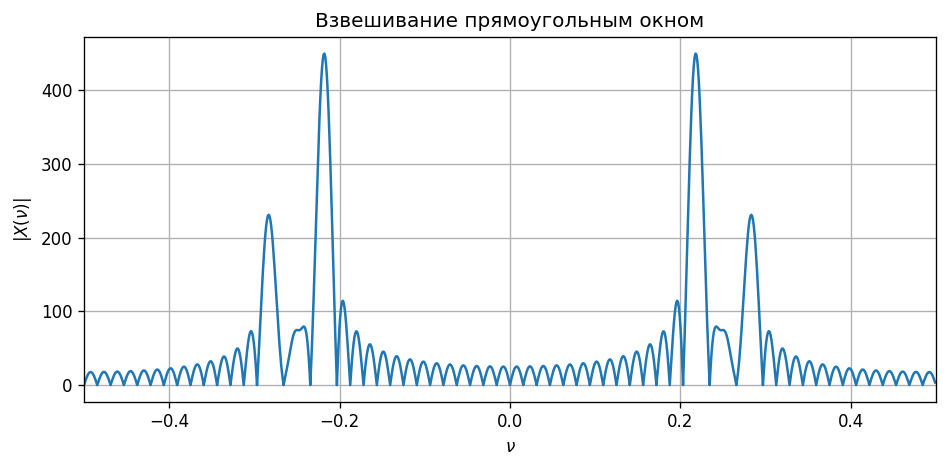

In [45]:
nu, Xn = DTFT(x)

plt.figure(figsize=[8, 4], dpi=120)
plt.title('Взвешивание прямоугольным окном')
plt.plot(nu, abs(Xn))
plt.xlabel('$\\nu$')
plt.ylabel('$|X(\\nu)|$')
plt.xlim([-0.5, 0.5])
plt.grid()
plt.tight_layout()

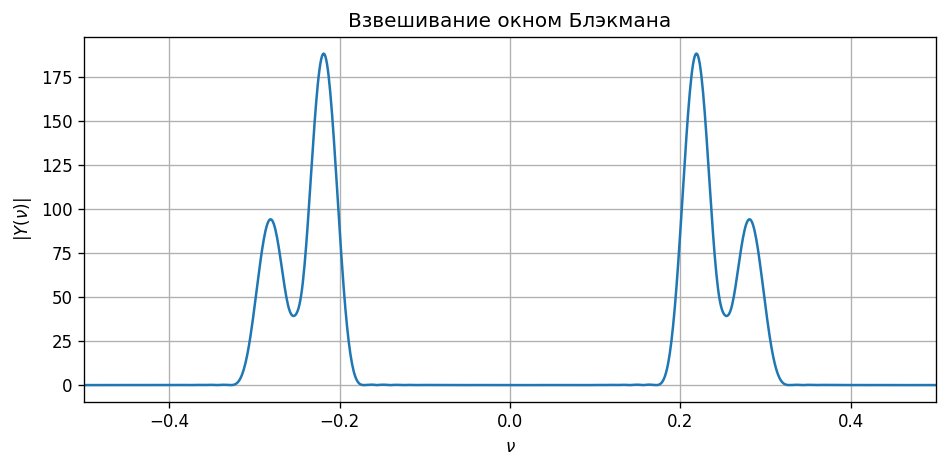

In [46]:
y=x*signal.windows.blackman(M=N, sym=False)
nu, Xn = DTFT(y)

plt.figure(figsize=[8, 4], dpi=120)
plt.title('Взвешивание окном Блэкмана')
plt.plot(nu, abs(Xn))
plt.xlabel('$\\nu$')
plt.ylabel('$|Y(\\nu)|$')
plt.xlim([-0.5, 0.5])
plt.grid()
plt.tight_layout()

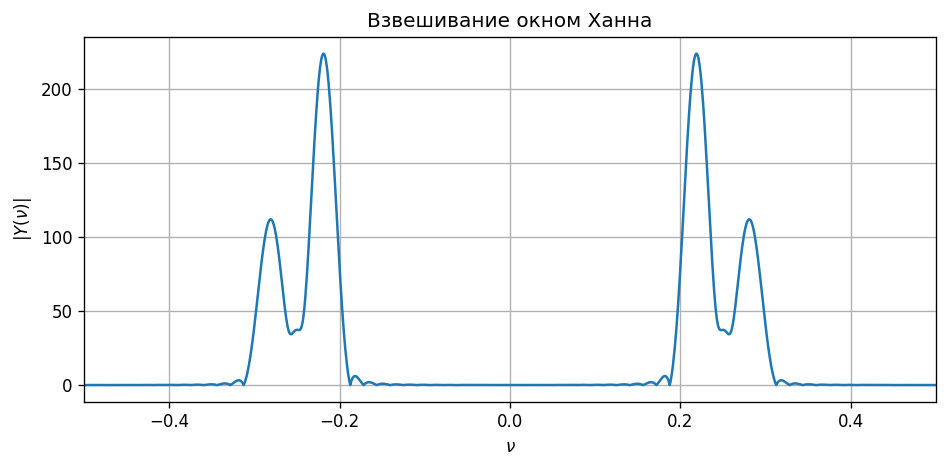

In [47]:
y = x * w
nu, Xn = DTFT(y)

plt.figure(figsize=[8, 4], dpi=120)
plt.title('Взвешивание окном Ханна')
plt.plot(nu, abs(Xn))
plt.xlabel('$\\nu$')
plt.ylabel('$|Y(\\nu)|$')
plt.xlim([-0.5, 0.5])
plt.grid()
plt.tight_layout()

## Задача 2.6. Амплитудная модуляция спектра.

| Варианты: | 1 | 2 | 3 | 4 | 5 | 6 | 7 | 8 | 9 | 10 | 11 | 12 |
|:--:|:--:|:--:|:--:|:--:|:--:|:--:|:--:|:--:|:--:|:--:|:--:|:--:|
|$n_0$|11,5 | 15,5 | 18,5 | 17,5 | 32,5 | 48,5 | 15,5 | 18,5 | 47,5 | 32,5 | 40,5 | 38,5 |

Произведите спектральный анализ с помощью ДПФ размерности $M=128$ последовательности 
$$x[k]=\cos\left(2\pi \dfrac{n_0}{128} k\right)$$
 со взвешиванием следующими оконными функциями длиной 128 отчетов:
 
 а) прямоугольным окном (`boxcar`),

 б) окном с плоской вершиной (`flattop`).
 
 
Значение параметра $n_0$ определите из таблицы. Отнормируйте ДПФ на значение АЧХ оконной функции на нулевой частоте ($W(0)=\sum_{k=0}^{N-1} w[k]$). Для двух окон сравните амплитуду гармоники с модулем ближайших к ней отсчетов ДПФ.

In [48]:
n0 = 17.5
N = 128
k = np.arange(N)
x = np.cos(2 * np.pi * n0 * k / 128)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  import sys


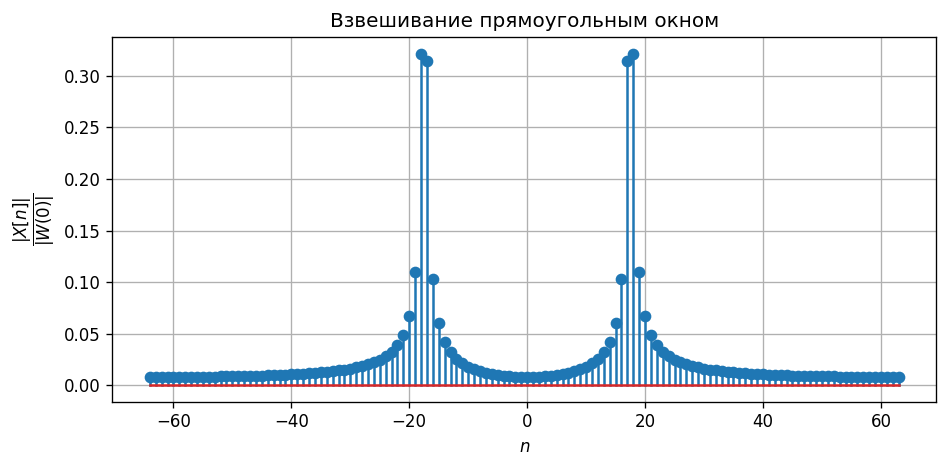

In [49]:
w=signal.windows.boxcar(x.size, sym=False)
y = x * w

Xn=np.fft.fftshift(np.fft.fft(y))

plt.figure(figsize=[8, 4], dpi=120)
plt.stem(np.arange(Xn.size)-N//2, abs(Xn)/sum(w))
plt.xlabel('$n$')
plt.ylabel('$\\dfrac{|X[n]|}{|W(0)|}$')
plt.title('Взвешивание прямоугольным окном')
plt.grid()
plt.tight_layout()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  


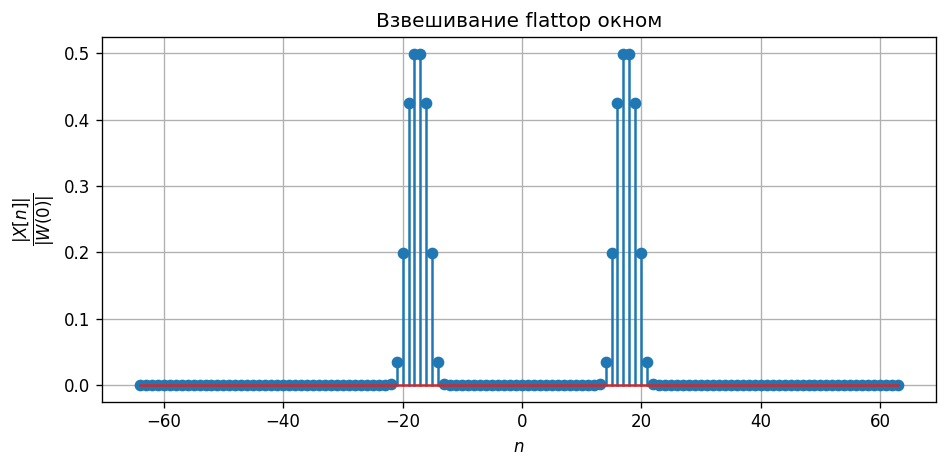

In [50]:
w=signal.windows.flattop(x.size, sym=False)
y=x*w


Xn=np.fft.fftshift(np.fft.fft(y))

plt.figure(figsize=[8, 4], dpi=120)
plt.stem(np.arange(Xn.size)-N//2, abs(Xn)/sum(w))
plt.xlabel('$n$')
plt.ylabel('$\\dfrac{|X[n]|}{|W(0)|}$')
plt.title('Взвешивание flattop окном')
plt.grid()
plt.tight_layout()

# Занятие 3. Кратковременное дискретное преобразование Фурье (STFT) 

## Задача 3.1. Спектрограмма аудиофайла.  

| Варианты: |       1      |     2     |         3        |      4     |        5        |        6       |
|:---------:|:------------:|:---------:|:----------------:|:----------:|:---------------:|:--------------:|
| **Имя файла** |'clarinet_minor.wav' | 'clarinet_major32.wav'| 'major_scale_flute1.wav' | 'major_scale_flute2.wav'|'major_scale_flute3.wav' | 'major_scale_flute4.wav'|

| Варианты: |       7      |     8     |         9        |      10     |        11        |        12       |
|:---------:|:------------:|:---------:|:----------------:|:----------:|:---------------:|:--------------:|
| **Имя файла** |'major_scale_flute5.wav'|'major_scale_piano2.wav'|'major_scale_piano3.wav'|'single_notes.wav'|'violin_natural_minor.wav'|'violin_natural_minor_up.wav'|


Вычислите кратковременное дискретное преобразование Фурье (STFT) для отсчетов сигнала, содержащихся в аудиофайле Вашего варианта. Изобразите спектрограмму сигнала. Длину окна (размер кадра), тип оконной функции, число точек в перекрытии, масштабы осей и размерность ДПФ самостоятельно подберите так, чтобы можно было выделить гармонические компоненты в сигнале. Ответьте на следующие вопросы.

1) Какие выводы можно сделать о составе данного сигнала по спектрограмме?  

2) Чему равен размер кадра в секундах и как это соотносится с графиком?

3) Какое разрешение по времени и какое по частоте для данной спектрограммы? 

4) Какие изменения можно наблюдать в спектрограмме, если изменяется:

* а) тип оконной функции,

* б) длина окна,

* в) размерность ДПФ (за счет дополнения нулевыми отсчетами)?


In [51]:
fs, x = scipy.io.wavfile.read('/content/drive/MyDrive/Classroom/Лаборатория ИКТ (Б01-908, Б01-909)/dataset/major_scale_flute2.wav')

In [52]:
Audio('/content/drive/MyDrive/Classroom/Лаборатория ИКТ (Б01-908, Б01-909)/dataset/major_scale_flute2.wav')

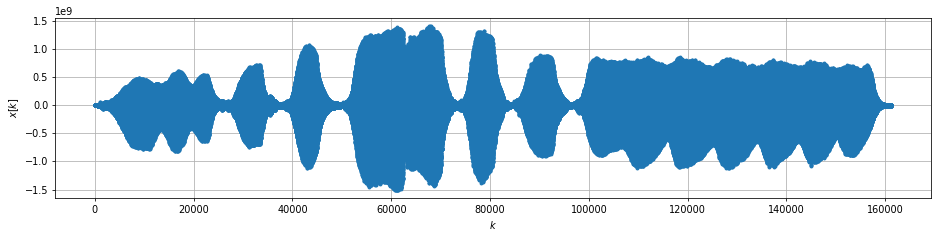

In [53]:
plt.figure(figsize=[13.5, 3.5], dpi=70)
plt.plot(np.arange(x.size), x, '.-')
plt.xlabel('$k$')
plt.ylabel('$x[k]$')
plt.tight_layout()
plt.grid()

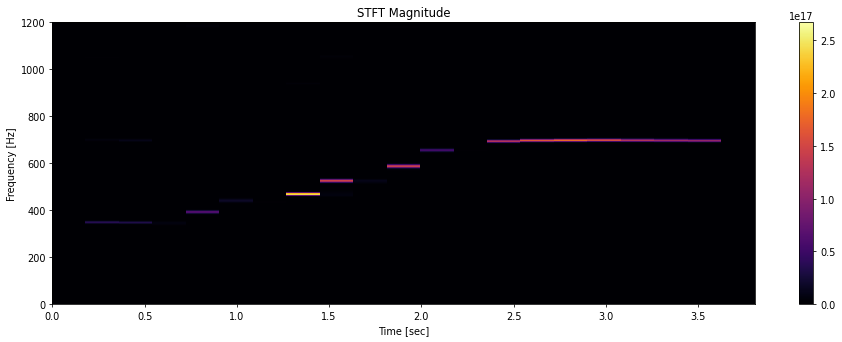

In [92]:
f, t, Zxx = signal.stft(x, fs=fs, window=('blackman'), nperseg=8000, noverlap=0, nfft=160000)
plt.figure(figsize=[13.5, 5], dpi=70)
plt.pcolormesh(t, f, np.abs(Zxx)**2, cmap=plt.get_cmap('inferno'), shading='flat')
plt.colorbar()
plt.ylim(0, 1200)
plt.title('STFT Magnitude')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.tight_layout()
plt.show()

## Задача 3.2. Спектрограмма ЛЧМ сигнала. 

| Варианты: | 1 | 2 | 3 | 4 | 5 | 6 | 7 | 8 | 9 | 10 | 11 | 12 |
|:--:|:--:|:--:|:--:|:--:|:--:|:--:|:--:|:--:|:--:|:--:|:--:|:--:|
|$f_0$, Гц | 170| 80 | 90 | 75 | 120 | 130 | 85 | 95 | 70 | 65 | 110 | 105 |
|$f_1$, Гц | 800 | 900 | 850 | 870 | 820 | 875 | 780 | 810 | 790 | 825 | 830 | 840 |

Постройте спектрограмму c окном Блэкмана для ЛЧМ-сигнала длительностью $T=2$ секундам, мгновенная частота которого изменяется от $f_0$ до $f_1$, частота дискретизации $f_s=2000$ Гц. Начальный размер кадра (`nperseg`) выберите $H=512$ отсчетов. Пронаблюдайте, как изменяется спектрограмма при изменении следующих параметров:
* тип оконной функции (`window`),
* длина кадра (`nperseg`),
* размерность ДПФ (`nfft`).

In [119]:
f0 = 75
f1 = 870
fs = 2000
window = 'blackman'
H = 512

t=np.arange(0, 2, 1/fs)
x = signal.chirp(t, f0=f0, f1=f1, t1=2, method='linear')
print(len(x))

4000


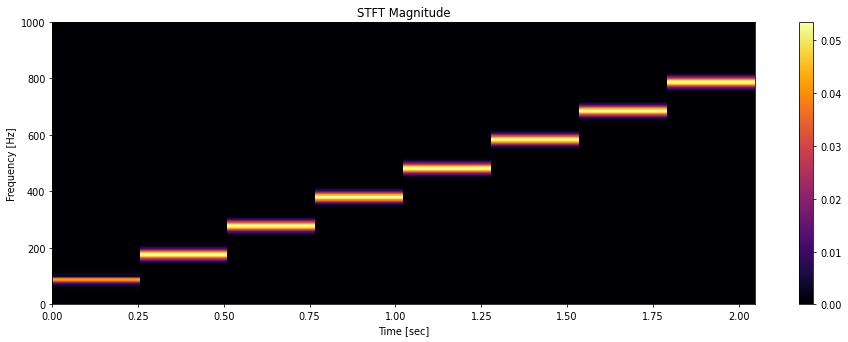

In [101]:
f, t, Zxx = signal.stft(x, fs=fs, window=(window), nperseg=H, noverlap=0, nfft=1024)
plt.figure(figsize=[13.5, 5], dpi=70)
plt.pcolormesh(t, f, np.abs(Zxx)**2, cmap=plt.get_cmap('inferno'), shading='flat')
plt.colorbar()
plt.title('STFT Magnitude')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.tight_layout()
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: RuntimeWarning: divide by zero encountered in log10


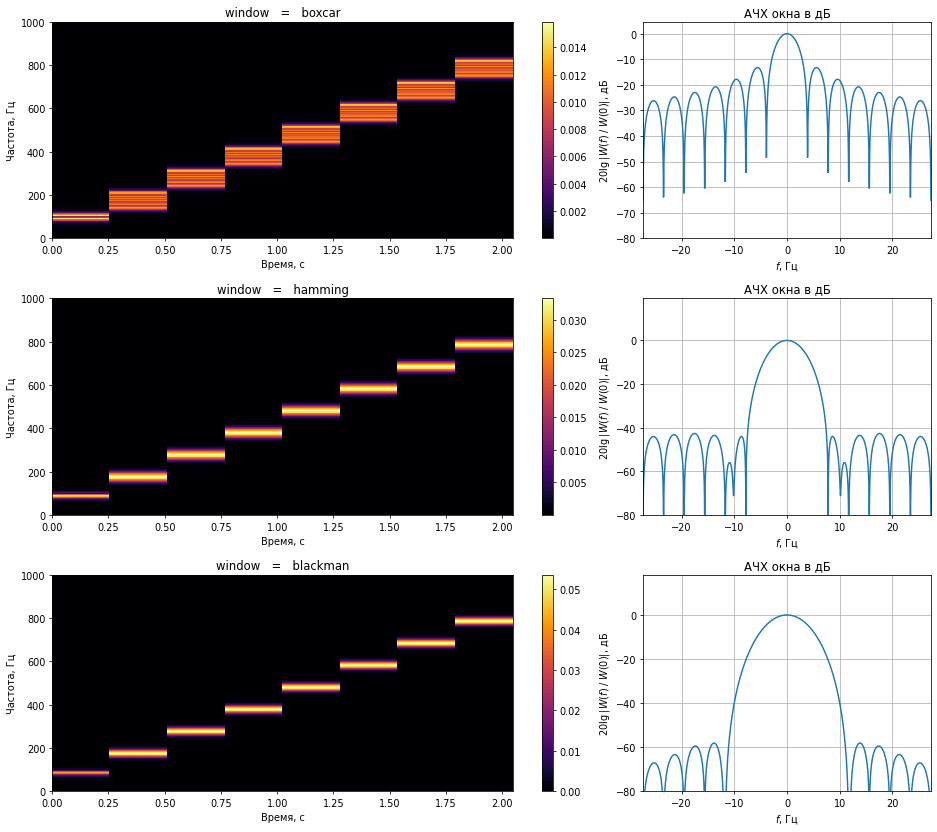

In [108]:
#поменяем окна
from matplotlib import gridspec
windows=['boxcar', 'hamming', 'blackman']
gs = gridspec.GridSpec(len(windows), 2, width_ratios=[8, 4])
u=0
plt.figure(figsize=[13.5, 12], dpi=70)
for window in windows: #'bartlett', 'hann', 
    plt.subplot(gs[u*2], title='window   =   %s' % (window))

    f, t, Zxx = signal.stft(x, fs=fs, window=window, nperseg=H, noverlap=0, nfft=1024)
    #plt.pcolormesh(t, f,  20*np.log10(np.abs(Zxx)/np.max(abs(Zxx))), cmap=plt.get_cmap('inferno'), shading='flat')
    plt.pcolormesh(t, f, np.abs(Zxx)**2, cmap=plt.get_cmap('inferno'), shading='flat')
    plt.colorbar()
    #plt.ylim((0, 250))
    plt.ylabel('Частота, Гц')
    plt.xlabel('Время, с')
    plt.tight_layout()
    
    plt.subplot(gs[u*2+1], title='АЧХ окна в дБ')
    w=signal.windows.get_window(window, Nx=H)
    nu, Wn = DTFT(w, M=2**17)
    plt.plot(nu*fs, 20*np.log10(abs(Wn)/max(abs(Wn))))
    plt.ylim(ymin=-80)
    plt.xlim([-7*fs/H, 7*fs/H])
    plt.grid()
    plt.xlabel('$f$, Гц')
    plt.ylabel('$20 \lg \; |W(f)\; / \;W(0)|$, дБ')
    
    plt.tight_layout()
    u+=1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: RuntimeWarning: divide by zero encountered in log10


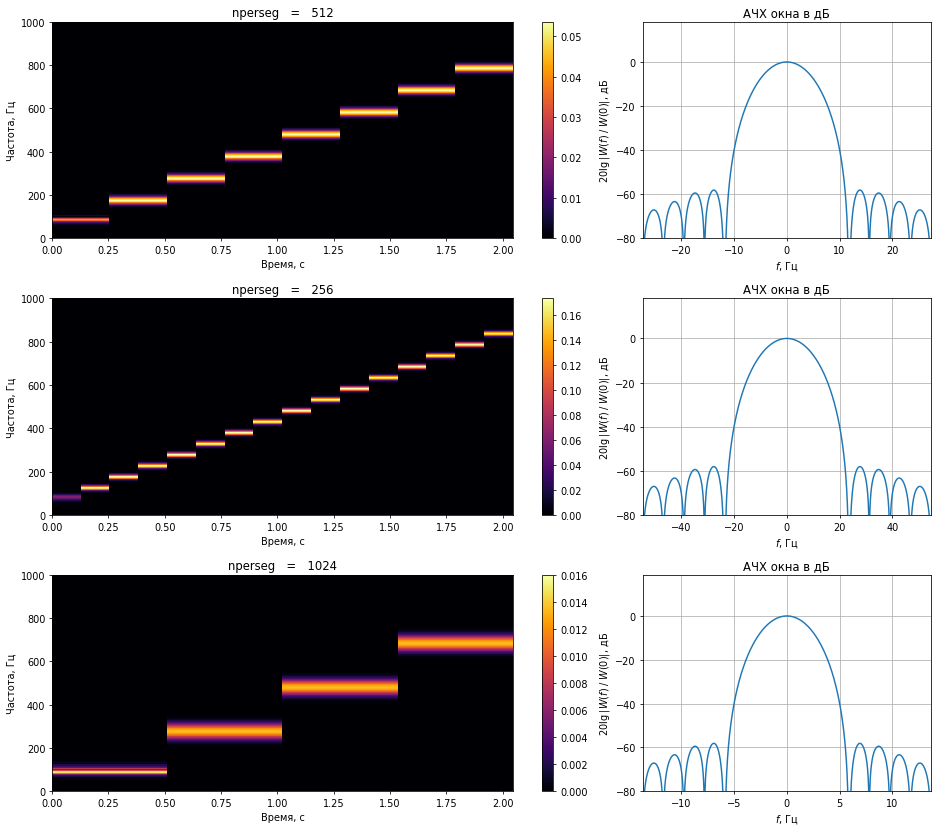

In [111]:
from matplotlib import gridspec

npersegs = [ H , int(H /2), H * 2]
gs = gridspec.GridSpec(len(windows), 2, width_ratios=[8, 4])
u=0
plt.figure(figsize=[13.5, 12], dpi=70)
for nperseg in npersegs: #'bartlett', 'hann', 
    plt.subplot(gs[u*2], title='nperseg   =   %d' % (nperseg))

    f, t, Zxx = signal.stft(x, fs=fs, window=window, nperseg=nperseg, noverlap=0, nfft=1024)
    #plt.pcolormesh(t, f,  20*np.log10(np.abs(Zxx)/np.max(abs(Zxx))), cmap=plt.get_cmap('inferno'), shading='flat')
    plt.pcolormesh(t, f, np.abs(Zxx)**2, cmap=plt.get_cmap('inferno'), shading='flat')
    plt.colorbar()
    #plt.ylim((0, 250))
    plt.ylabel('Частота, Гц')
    plt.xlabel('Время, с')
    plt.tight_layout()
    
    plt.subplot(gs[u*2+1], title='АЧХ окна в дБ')
    w=signal.windows.get_window(window, Nx=nperseg)
    nu, Wn = DTFT(w, M=2**17)
    plt.plot(nu*fs, 20*np.log10(abs(Wn)/max(abs(Wn))))
    plt.ylim(ymin=-80)
    plt.xlim([-7*fs/nperseg, 7*fs/nperseg])
    plt.grid()
    plt.xlabel('$f$, Гц')
    plt.ylabel('$20 \lg \; |W(f)\; / \;W(0)|$, дБ')
    
    plt.tight_layout()
    u+=1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: RuntimeWarning: divide by zero encountered in log10


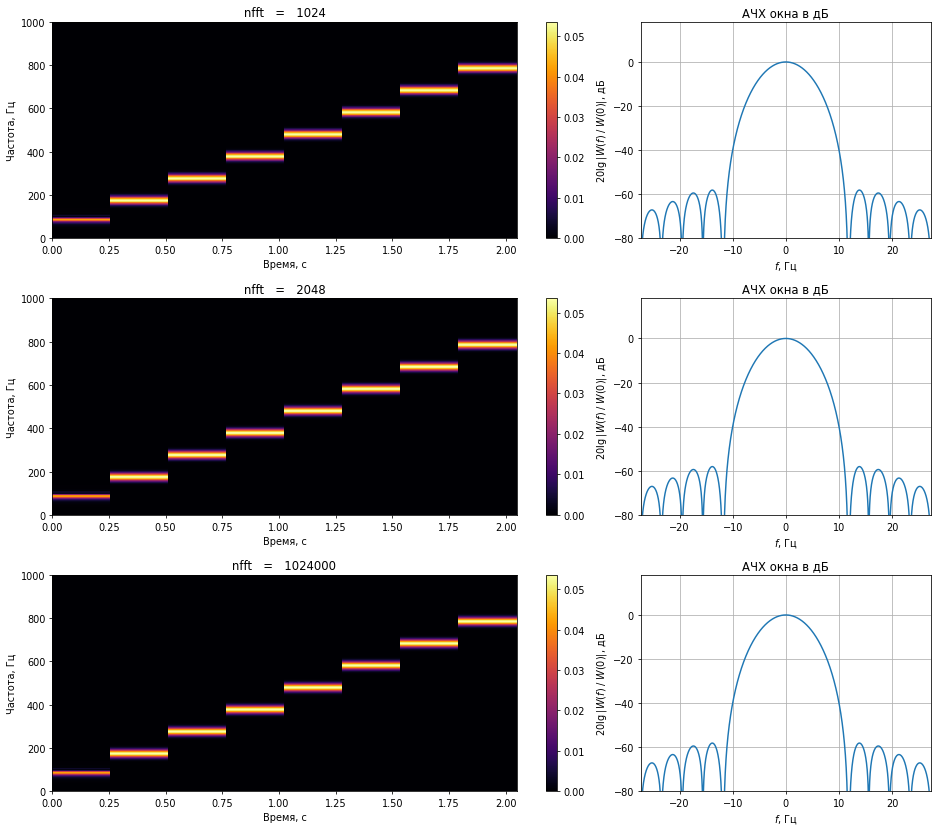

In [117]:
nffts = [ 1024, 1024*2, 1024*1000]
nperseg = H

gs = gridspec.GridSpec(len(windows), 2, width_ratios=[8, 4])
u=0
plt.figure(figsize=[13.5, 12], dpi=70)
for nfft in nffts: #'bartlett', 'hann', 
    plt.subplot(gs[u*2], title='nfft   =   %d' % (nfft))

    f, t, Zxx = signal.stft(x, fs=fs, window=window, nperseg=nperseg, noverlap=0, nfft=nfft)
    #plt.pcolormesh(t, f,  20*np.log10(np.abs(Zxx)/np.max(abs(Zxx))), cmap=plt.get_cmap('inferno'), shading='flat')
    plt.pcolormesh(t, f, np.abs(Zxx)**2, cmap=plt.get_cmap('inferno'), shading='flat')
    plt.colorbar()
    #plt.ylim((0, 250))
    plt.ylabel('Частота, Гц')
    plt.xlabel('Время, с')
    plt.tight_layout()
    
    plt.subplot(gs[u*2+1], title='АЧХ окна в дБ')
    w=signal.windows.get_window(window, Nx=nperseg)
    nu, Wn = DTFT(w, M=2**17)
    plt.plot(nu*fs, 20*np.log10(abs(Wn)/max(abs(Wn))))
    plt.ylim(ymin=-80)
    plt.xlim([-7*fs/nperseg, 7*fs/nperseg])
    plt.grid()
    plt.xlabel('$f$, Гц')
    plt.ylabel('$20 \lg \; |W(f)\; / \;W(0)|$, дБ')
    
    plt.tight_layout()
    u+=1